# **Diplomatura en Ciencias de Datos**
## *Universidad Nacional del Nordeste*

### Evaluación de los módulos 1 y 2.


#### ***Grupo 19***
+ Simón M. Olivieri
+ Leandro D. Urturi
+ Camila M. Muñoz




### ***Consignas mínimas:***
+ Explore las variables de temperatura y precipitación en la ciudad de Resistencia tomando la hipótesis de independencia de los datos/series.
+ Realice estadística descriptiva sobre las variables.
+ Vea si los datos son completos y que hacer ante la ausencia de datos.
+ Analice la covarianza de la temperatura entre las ciudades de Resistencia, Corrientes y Mendoza.
+ Discuta como es la correlación entre la temperatura y la precipitación en las distintas ciudades.

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

# Lectura y copia de la bases de datos
df_original = pd.read_csv('estaciones_meteorol.csv')
df = df_original.copy()

#### ***Datos diarios de las estaciones meteorológicas del Servicio Meteorológico Nacional***

Los datos corresponden a:
+ NAME= Ciudad de la Estación Meteorológica.
+ DATE= Dia.
+ PRCP= Precipitación acumulada.
+ TAVG= Temperatura promedio.
+ TMAX= Temperatura Máxima.
+ TMIN= Temperatura Mínima.

In [2]:
df.head(20)

,Unnamed: 0,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,1,"CORRIENTES, AR",1980-01-01,0.0,22.0,NaN,13.0
1,2,"CORRIENTES, AR",1980-01-02,0.0,24.0,NaN,14.0
2,3,"CORRIENTES, AR",1980-01-03,0.0,25.7,NaN,14.0
3,4,"CORRIENTES, AR",1980-01-04,NaN,28.1,NaN,NaN
4,5,"CORRIENTES, AR",1980-01-05,NaN,24.3,33.0,NaN
5,6,"CORRIENTES, AR",1980-01-06,5.1,27.7,NaN,20.0
6,7,"CORRIENTES, AR",1980-01-07,0.0,27.7,34.0,NaN
7,8,"CORRIENTES, AR",1980-01-08,39.1,25.7,34.0,18.0
8,9,"CORRIENTES, AR",1980-01-09,0.0,27.6,NaN,NaN
9,10,"CORRIENTES, AR",1980-01-10,0.0,27.9,33.0,20.0


Transformamos la columna 'DATE' en una variable datetime de pandas y luego imprimimos la información de todas las variables del dataframe.

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60450 entries, 0 to 60449
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  60450 non-null  int64         
 1   NAME        60450 non-null  object        
 2   DATE        60450 non-null  datetime64[ns]
 3   PRCP        25476 non-null  float64       
 4   TAVG        53025 non-null  float64       
 5   TMAX        40409 non-null  float64       
 6   TMIN        51998 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.2+ MB


Imprimimos la cantidad de Provincias que habían en nuestra base de datos

In [4]:
lista_provincias=df['NAME'].unique()
print(lista_provincias)
print(len(lista_provincias))

['CORRIENTES, AR' 'BUENOS AIRES OBSERV, AR' 'RESISTENCIA AERO, AR'
 'MENDOZA AERO, AR']
4


Dividimos la base de datos en cada provincia de análisis, establecimos la columna DATE como index y luego imprimimos la cantidad de  datos de cada provincia

In [5]:
df_resistencia=df[df['NAME']=='RESISTENCIA AERO, AR']
df_corrientes=df[df['NAME']=='CORRIENTES, AR']
df_mendoza=df[df['NAME']=='MENDOZA AERO, AR']

print(f'la cantidad de datos de Resistencia es: {df_resistencia.shape[0]}')
print(f'la cantidad de datos de Corrientes es: {df_corrientes.shape[0]}')
print(f'la cantidad de datos de Mendoza es: {df_mendoza.shape[0]}')


# Establecer la columna de DATE como índice
df_resistencia.set_index('DATE', inplace=True)
df_corrientes.set_index('DATE', inplace=True)
df_mendoza.set_index('DATE', inplace=True)

# Realizamos una copia del dateframe
df_resistencia_temp = df_resistencia.copy()

la cantidad de datos de Resistencia es: 15940
la cantidad de datos de Corrientes es: 15292
la cantidad de datos de Mendoza es: 15936


Eliminamos los valores faltantes de la variable de precipitaciones en cada ciudad.

In [6]:
df_resistencia = df_resistencia.dropna(subset=['PRCP']).copy()
df_corrientes = df_corrientes.dropna(subset=['PRCP']).copy()
df_mendoza = df_mendoza.dropna(subset=['PRCP']).copy()

### **Análisis exploratorio**


1. El primer paso es entender las variables de nuestro dataset.
+ NAME= Ciudad de la Estación Meteorológica.
+ DATE= Dia en formato dd/mm/aaaa.
+ PRCP= Precipitación acumulada en milimetros.
+ TAVG= Temperatura promedio en grados centígrados (°C).
+ TMAX= Temperatura Máxima en grados centígrados (°C).
+ TMIN= Temperatura Mínima en grados centígrados (°C).

2. Exploraremos las siguientes variables tomando la hipótesis de independencia de los datos: **PRCP**, **TAVG**, **TMAX** y **TMIN** para la ciudad de **Resistencia**.

In [7]:
print("Información de variables de Resistencia")
df_resistencia.info()

Información de variables de Resistencia
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9039 entries, 1980-01-01 to 2023-08-24
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9039 non-null   int64  
 1   NAME        9039 non-null   object 
 2   PRCP        9039 non-null   float64
 3   TAVG        9039 non-null   float64
 4   TMAX        7306 non-null   float64
 5   TMIN        8050 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 494.3+ KB


Una vez que eliminamos datos faltantes de precipitaciones observamos que habían datos faltantes en las variables de temperaturas, en consecuencia decidimos rellenar los datos mediante una interpolación lineal, nuestra elección se basó en que las temperaturas no varían bruscamente entre temperaturas consecutivas.

In [8]:
# Interpolación lineal
df_resistencia_1 = df_resistencia.copy()
df_resistencia_1['TMAX'] = df_resistencia_1['TMAX'].interpolate(method='linear')
df_resistencia_1['TMIN'] = df_resistencia_1['TMIN'].interpolate(method='linear')
# Mostrar el dataframe después de la interpolación
print("\nDatos después de la interpolación lineal:")
print(df_resistencia_1.head())


Datos después de la interpolación lineal:
            Unnamed: 0                  NAME   PRCP  TAVG  TMAX  TMIN
DATE                                                                 
1980-01-01       28575  RESISTENCIA AERO, AR    0.0  19.6  25.8  11.0
1980-01-02       28576  RESISTENCIA AERO, AR    0.0  20.8  28.1  13.4
1980-01-03       28577  RESISTENCIA AERO, AR    0.0  22.7  30.7  14.0
1980-01-04       28578  RESISTENCIA AERO, AR  153.9  24.8  32.8  15.2
1980-01-05       28579  RESISTENCIA AERO, AR    0.0  23.4  33.2  20.8


Verificamos que se hayan completado todos los datos imprimiendo la cantidad de datos nulos de cada variable

In [9]:
# Verificar si quedan datos faltantes
print("\nCantidad de datos faltantes después de la interpolación:")
print(df_resistencia_1.isnull().sum())


Cantidad de datos faltantes después de la interpolación:
Unnamed: 0    0
NAME          0
PRCP          0
TAVG          0
TMAX          0
TMIN          0
dtype: int64


Realizamos una descripción del total de las variables, podemos observar:

+ La cantidad de datos

+ Media

+ Varianza

+ Desvío

+ cuantiles Q1,Q2,Q3

+ Valores mínimos y máximos

In [10]:
df_resistencia = df_resistencia_1.copy()
print(df_resistencia.describe())
print("Varianza de precipitación:")
print(df_resistencia['PRCP'].var())
print("Varianza de Temperatura Máxima:")
print(df_resistencia['TMAX'].var())
print("Varianza de Temperatura Mínima:")
print(df_resistencia['TMIN'].var())
print("Varianza de Temperatura Media:")
print(df_resistencia['TAVG'].var())


         Unnamed: 0         PRCP         TAVG         TMAX         TMIN
count   9039.000000  9039.000000  9039.000000  9039.000000  9039.000000
mean   35300.570306     5.548512    21.050105    27.864078    15.796720
std     4351.694320    16.799784     5.490863     6.114306     5.902908
min    28575.000000     0.000000     3.100000     9.000000    -4.700000
25%    31834.000000     0.000000    17.300000    23.600000    12.200000
50%    34626.000000     0.000000    22.000000    28.600000    17.000000
75%    38464.500000     2.000000    25.200000    32.500000    20.400000
max    44514.000000   373.100000    35.300000    42.400000    27.500000
Varianza de precipitación:
282.2327304145217
Varianza de Temperatura Máxima:
37.3847411006753
Varianza de Temperatura Mínima:
34.84432700407797
Varianza de Temperatura Media:
30.149574839583412


Dividimos los datos en 3 dataframe diferentes para poder analizar las variables agrupadas en diferentes periodos de tiempo. (Semanal, mensual, anual)

Para cada grupo se calcularon:

* Media
* Suma
* Máximo
* Varianza
* Desvío


In [11]:
# Resampleo semanal
df_semanal = df_resistencia['PRCP'].resample('W').mean()
df_semanal_sum=df_resistencia['PRCP'].resample('W').sum()
df_semanal_max=df_resistencia['PRCP'].resample('W').max()
df_semanal_varianza=df_resistencia['PRCP'].resample('W').var()
df_semanal_desvio=df_resistencia['PRCP'].resample('W').std()

# Resampleo mensual
df_mensual = df_resistencia['PRCP'].resample('ME').mean()
df_mensual_sum=df_resistencia['PRCP'].resample('ME').sum()
df_mensual_max=df_resistencia['PRCP'].resample('ME').max()
df_mensual_varianza=df_resistencia['PRCP'].resample('ME').var()
df_mensual_desvio=df_resistencia['PRCP'].resample('ME').std()

# Resampleo anual
df_anual = df_resistencia['PRCP'].resample('YE').mean()
df_anual_sum=df_resistencia['PRCP'].resample('YE').sum()
df_anual_max=df_resistencia['PRCP'].resample('YE').max()
df_anual_varianza=df_resistencia['PRCP'].resample('YE').var()
df_anual_desvio=df_resistencia['PRCP'].resample('YE').std()

df_semanal.describe()

count    2011.000000
mean        5.724779
std         9.606557
min         0.000000
25%         0.000000
50%         2.025000
75%         7.354762
max       127.000000
Name: PRCP, dtype: float64

3. Graficamos nuestras variables.

Esto nos permitirá observar el comportamiento de los datos y/o valores atípicos (outliers) en nuestra base datos


In [12]:
#Visualización de las precipitaciones en Resistencia
fig_PRCP = px.line(df_semanal_sum)
fig_PRCP.update_layout(
    title='Precipitaciones semanales',
    xaxis_title='Años',
    yaxis_title='Precipitación semanal (mm)'
)
fig_PRCP.show()

fig_PRCP = px.line(df_mensual_sum)
fig_PRCP.update_layout(
    title='Precipitaciones mensuales',
    xaxis_title='Años',
    yaxis_title='Precipitación mensual (mm)'
)
fig_PRCP.show()


fig_PRCP = px.line(df_anual_sum)
fig_PRCP.update_layout(
    title='Precipitaciones anuales',
    xaxis_title='Años',
    yaxis_title='Precipitación anual (mm)'
)
fig_PRCP.show()




Del gráfico semanal pudimos observar la precipitación de 353mm de Abril del 1982 - 376mm en Mayo 1983.
También podemos observar que las precipitaciones anuales rondan entre los 1000mm y 1500mm  

Realizamos los histogramas de precipitaciones para los distintas serie de tiempos

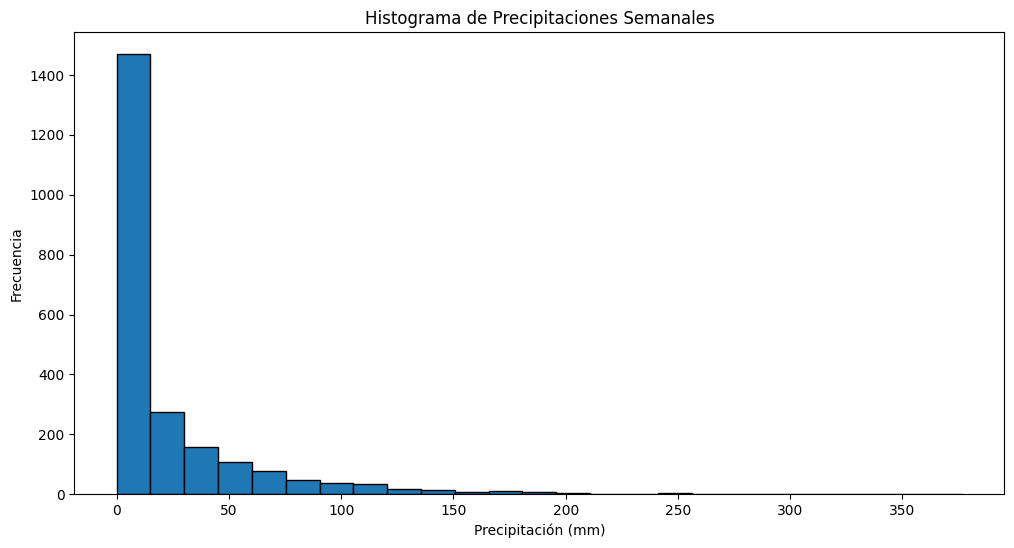

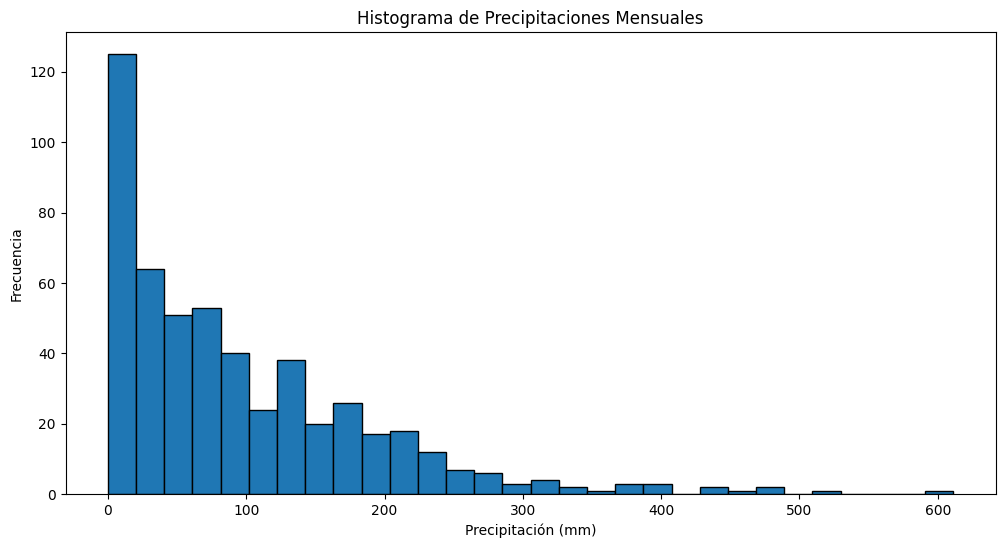

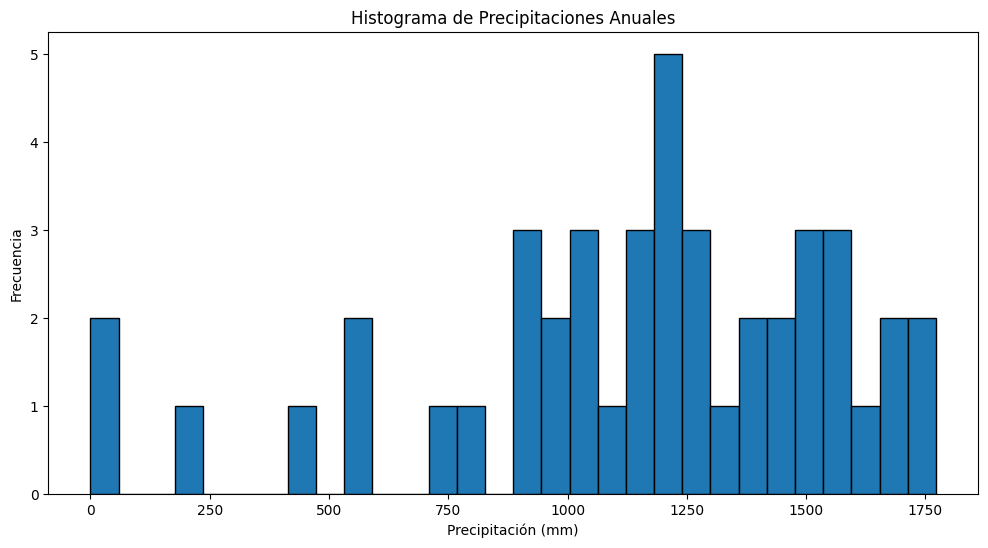

In [13]:

plt.figure(figsize=(12, 6))
plt.hist(df_semanal_sum.dropna(), bins=25, edgecolor='black')
plt.title('Histograma de Precipitaciones Semanales')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
# Ajustar los ejes
#plt.xticks(np.arange(0, df_semanal_sum.max() + 5, 5))
plt.show()

# Histograma de precipitaciones mensuales
plt.figure(figsize=(12, 6))
plt.hist(df_mensual_sum.dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Precipitaciones Mensuales')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()


# Histograma
plt.figure(figsize=(12, 6))
plt.hist(df_anual_sum.dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Precipitaciones Anuales')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()


Realizamos los gráficos de boxplot para identificar valores atípicos y la distribución de los datos

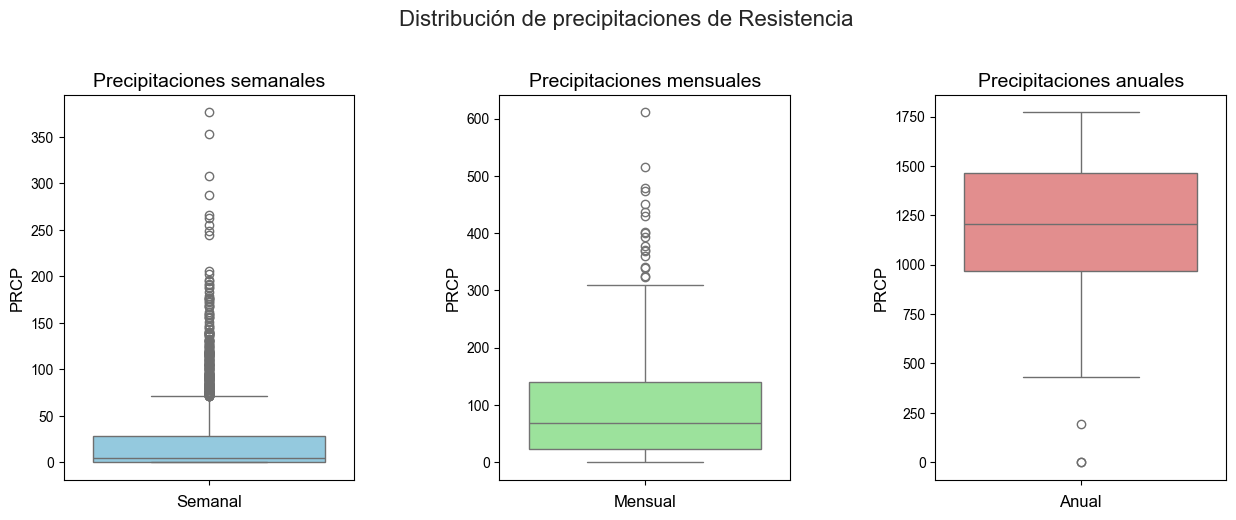

In [14]:

# Crear una Serie de ejemplo
serie_semanal = pd.Series(df_semanal_sum, name='PRCP_Sem')
serie_mensual = pd.Series(df_mensual_sum, name='PRCP_Men')
serie_anual = pd.Series(df_anual_sum, name='PRCP_Anual')

# Convertir la Serie en un DataFrame
data_semanal = serie_semanal.to_frame()
data_mensual = serie_mensual.to_frame()
data_anual = serie_anual.to_frame()

# Realizamos un boxplot para las variables numéricas
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Ajustamos el tamaño de la figura

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Boxplot de precipitaciones semanales
sns.boxplot(y=data_semanal['PRCP_Sem'], ax=ax[0], color='skyblue')
ax[0].set_title("Precipitaciones semanales", fontsize=14)
ax[0].set_ylabel("PRCP", fontsize=12)
ax[0].set_xlabel("Semanal", fontsize=12)

# Boxplot de precipitaciones mensuales
sns.boxplot(y=data_mensual['PRCP_Men'], ax=ax[1], color='lightgreen')
ax[1].set_title("Precipitaciones mensuales", fontsize=14)
ax[1].set_ylabel("PRCP", fontsize=12)
ax[1].set_xlabel("Mensual", fontsize=12)

# Boxplot de precipitaciones anuales
sns.boxplot(y=data_anual['PRCP_Anual'], ax=ax[2], color='lightcoral')
ax[2].set_title("Precipitaciones anuales", fontsize=14)
ax[2].set_ylabel("PRCP", fontsize=12)
ax[2].set_xlabel("Anual", fontsize=12)

# Ajustes adicionales de la figura
fig.suptitle('Distribución de precipitaciones de Resistencia', fontsize=16, y=1.05)
plt.subplots_adjust(wspace=0.5)  # Ajustamos el espacio entre subplots

# Mostrar el gráfico
plt.show()

Realizamos la impresión de los gráficos de temperatura de la ciudad de resistencia con espaciamiento uniforme (semanal,mensual,anual), y obtemos los datos de media para realizar un análisis descriptivo

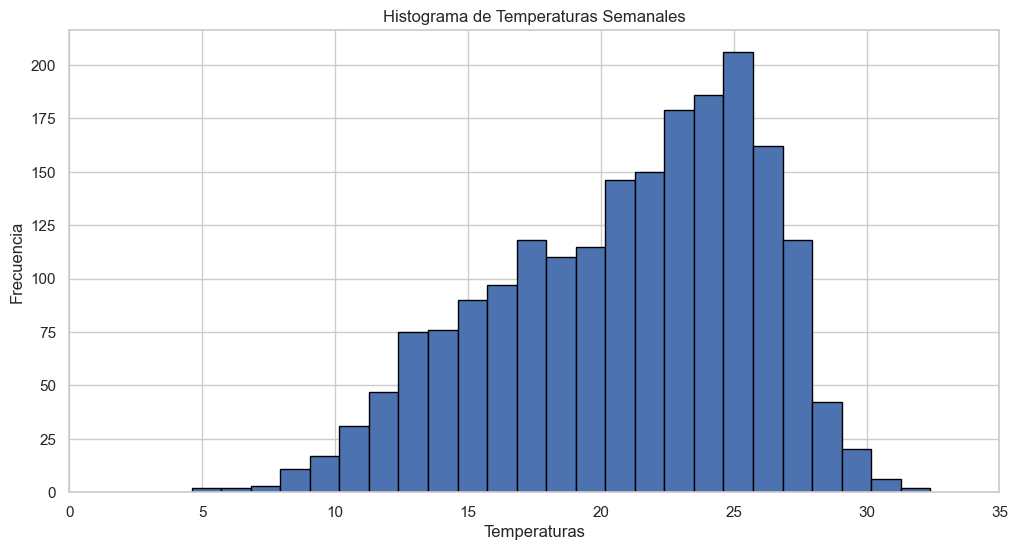

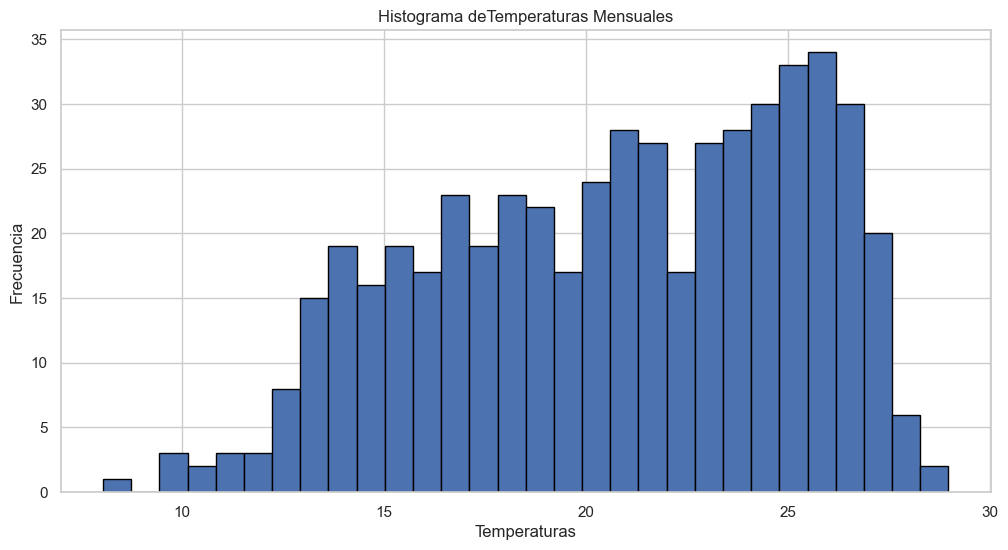

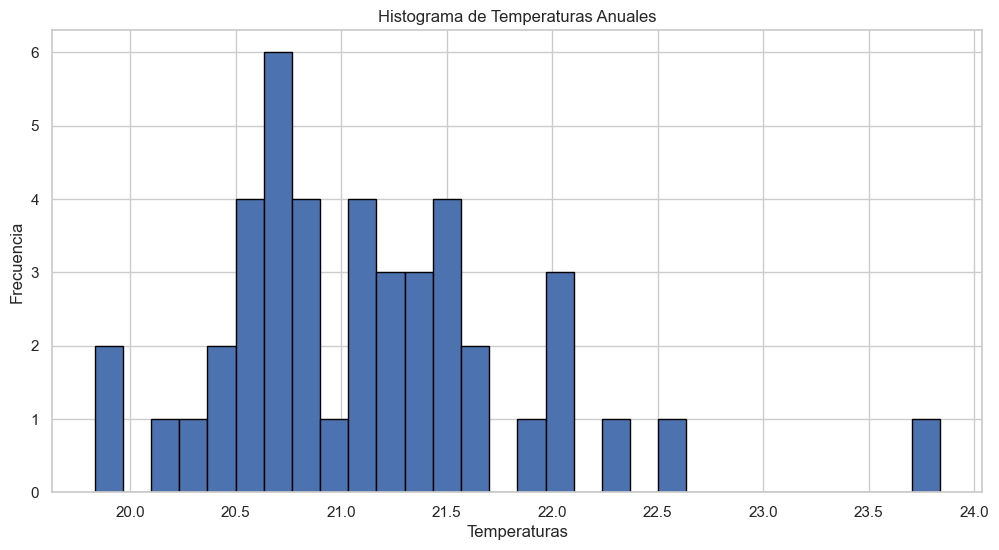

In [15]:
# Resampleo temperaturas semanales
df_semanal = df_resistencia['TAVG'].resample('W').mean()
df_semanal_tmin = df_resistencia['TMIN'].resample('W').mean()
df_semanal_tmax = df_resistencia['TMAX'].resample('W').mean()

#Temperatura Mensuales
df_mensual_tmax = df_resistencia['TMAX'].resample('ME').mean()
df_mensual_tmin = df_resistencia['TMIN'].resample('ME').mean()
df_mensual = df_resistencia['TAVG'].resample('ME').mean()

# Resampleo anual
df_anual = df_resistencia['TAVG'].resample('YE').mean()
df_anual_tmin = df_resistencia['TMIN'].resample('YE').mean()
df_anual_tmax = df_resistencia['TMAX'].resample('YE').mean()

#Visualización de las temperaturas en Resistencia
fig_PRCP_1 = px.line(df_semanal, color_discrete_sequence=['green'])
fig_PRCP_1.update_layout(
    title='Datos de Temperaturas Media Semanales',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la segunda figura
fig_PRCP_2 = px.line(df_semanal_tmax, color_discrete_sequence=['red'])
fig_PRCP_2.update_layout(
    title='Datos de Temperaturas Máxima Semanales',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la tercera figura
fig_PRCP_3 = px.line(df_semanal_tmin, color_discrete_sequence=['blue'])
fig_PRCP_3.update_layout(
    title='Datos de Temperaturas Mínima Semanales',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)
# Mostrar las figuras
fig_PRCP_1.show()
fig_PRCP_2.show()
fig_PRCP_3.show()

#Visualización de las temperaturas en Resistencia
fig_PRCP_1 = px.line(df_mensual, color_discrete_sequence=['green'])
fig_PRCP_1.update_layout(
    title='Datos de Temperaturas Media Mensual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la segunda figura
fig_PRCP_2 = px.line(df_mensual_tmax, color_discrete_sequence=['red'])
fig_PRCP_2.update_layout(
    title='Datos de Temperaturas Máxima Mensual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la tercera figura
fig_PRCP_3 = px.line(df_mensual_tmin, color_discrete_sequence=['blue'])
fig_PRCP_3.update_layout(
    title='Datos de Temperaturas Mínima Mensual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Mostrar las figuras
fig_PRCP_1.show()
fig_PRCP_2.show()
fig_PRCP_3.show()

# Crear y personalizar la tercera figura
fig_PRCP_3 = px.line(df_anual, color_discrete_sequence=['blue'])
fig_PRCP_3.update_layout(
    title='Datos de Temperaturas Media Anual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la segunda figura
fig_PRCP_2 = px.line(df_anual_tmax, color_discrete_sequence=['red'])
fig_PRCP_2.update_layout(
    title='Datos de Temperaturas Máxima Anual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Crear y personalizar la tercera figura
fig_PRCP_3 = px.line(df_anual_tmin, color_discrete_sequence=['blue'])
fig_PRCP_3.update_layout(
    title='Datos de Temperaturas Mínima Anual',
    xaxis_title='Años',
    yaxis_title='Temperatura (°C)'
)

# Mostrar las figuras
fig_PRCP_1.show()
fig_PRCP_2.show()
fig_PRCP_3.show()


plt.figure(figsize=(12, 6))
plt.hist(df_semanal.dropna(), bins=25, edgecolor='black')
plt.title('Histograma de Temperaturas Semanales')
plt.xlabel('Temperaturas')
plt.ylabel('Frecuencia')
# Ajustar los ejes
plt.xticks(np.arange(0, df_semanal.max() + 5, 5))
plt.show()

# Histograma de precipitaciones mensuales
plt.figure(figsize=(12, 6))
plt.hist(df_mensual.dropna(), bins=30, edgecolor='black')
plt.title('Histograma deTemperaturas Mensuales')
plt.xlabel('Temperaturas')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(df_anual.dropna(), bins=30, edgecolor='black')
plt.title('Histograma de Temperaturas Anuales')
plt.xlabel('Temperaturas')
plt.ylabel('Frecuencia')
plt.show()

Para realizar el análisis de correlación entre la temperatura y la precipitación en las distintas ciudades, se toma la decisión de eliminar los años donde los valores de precipitación no tienen al menos 130 valores, y la variable de temperatura decidimos reemplazar los datos faltantes por la media anual ya que el análisis que vamos a realizar será anual.

In [16]:
# Verificamos si hay datos faltantes
year_con_datos_R = []
year_mean_R = []
year_con_datos_C = []
year_mean_C = []
year_con_datos_M = []
year_mean_M = []
year_sin_datos_R=[]
year_sin_datos_C=[]
year_sin_datos_M=[]
year = np.arange(1980,2024,1)
for x in year:
    fecha_inicio = datetime.datetime(year=x, month=1, day=1)
    fecha_fin = datetime.datetime(year=x, month=12, day=31)
    df_PRCP_filtrar_R = df_resistencia[(df_resistencia.index >= fecha_inicio) & (df_resistencia.index <= fecha_fin)]['PRCP'].count()
    df_PRCP_filtrar_C = df_corrientes[(df_corrientes.index >= fecha_inicio) & (df_corrientes.index <= fecha_fin)]['PRCP'].count()
    df_PRCP_filtrar_M = df_mendoza[(df_mendoza.index >= fecha_inicio) & (df_mendoza.index <= fecha_fin)]['PRCP'].count()
    if (df_PRCP_filtrar_R) > 130:
        year_con_datos_R.append(x)
        year_mean_R.append(df_PRCP_filtrar_R)
    else: year_sin_datos_R.append(x)

    if (df_PRCP_filtrar_C) > 130:
        year_con_datos_C.append(x)
        year_mean_C.append(df_PRCP_filtrar_C)
    else: year_sin_datos_C.append(x)

    if (df_PRCP_filtrar_M) > 130:
        year_con_datos_M.append(x)
        year_mean_M.append(df_PRCP_filtrar_M)
    else: year_sin_datos_M.append(x)

In [17]:
print(year_con_datos_R)
print(f"la cantidad de años con precipitaciones con mas de 130 valores de Resistencia es de: {len(year_con_datos_R)}")

print(year_con_datos_C)
print(f"la cantidad de años con precipitaciones con mas de 130 valores de Corrientes es de: {len(year_con_datos_C)}")

print(year_con_datos_M)
print(f"la cantidad de años con precipitaciones con mas de 130 valores de Mendoza es de: {len(year_con_datos_M)}")


[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2002, 2003, 2004, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
la cantidad de años con precipitaciones con mas de 130 valores de Resistencia es de: 35
[1980, 1981, 1983, 1984, 1994, 1996, 1997, 1998, 2002, 2003, 2004, 2005, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2019]
la cantidad de años con precipitaciones con mas de 130 valores de Corrientes es de: 21
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 2002, 2003, 2004, 2005]
la cantidad de años con precipitaciones con mas de 130 valores de Mendoza es de: 23


A continuación se eliminan los años que no cumplían con la condición.

In [18]:
# Resamplear los datos anuales
df_anual_resistencia = df_resistencia['PRCP'].resample('YE').sum().copy()
# Resamplear los datos mensuales
df_mensual_resistencia=df_resistencia['PRCP'].resample('ME').sum().copy()

# Resamplear los datos mensuales
df_semanal_resistencia=df_resistencia['PRCP'].resample('W').sum().copy()

# Eliminar las filas correspondientes a los años en `year_sin_datos_R`
for x in year_sin_datos_R:
    # Crear la fecha del final del año
    y = pd.to_datetime(f"{x}-12-31")

    # Eliminar la fila correspondiente al año específico
    if y in df_anual_resistencia.index:
        df_anual_resistencia = df_anual_resistencia.drop(y, axis=0)


# Resamplear los datos anuales para corrientes
df_anual_corrientes = df_corrientes['PRCP'].resample('YE').sum().copy()

# Eliminar las filas correspondientes a los años en `year_sin_datos_R`
for x in year_sin_datos_C:
    # Crear la fecha del final del año
    y = pd.to_datetime(f"{x}-12-31")

    # Eliminar la fila correspondiente al año específico
    if y in df_anual_corrientes.index:
        df_anual_corrientes = df_anual_corrientes.drop(y, axis=0)


# Resamplear los datos anuales para mendoza
df_anual_mendoza = df_mendoza['PRCP'].resample('YE').sum().copy()

# Eliminar las filas correspondientes a los años en `year_sin_datos_R`
for x in year_sin_datos_M:
    # Crear la fecha del final del año
    y = pd.to_datetime(f"{x}-12-31")

    # Eliminar la fila correspondiente al año específico
    if y in df_anual_mendoza.index:

        df_anual_mendoza = df_anual_mendoza.drop(y, axis=0)

Analizaremos la correlación yla covarianza de la precipitación y la temperatura en periodos anuales

A continuación creamos un dataframe para resistencia con los datos de resampleo anual

In [19]:
df_anual_1 = df_resistencia.copy().drop([ 'NAME', 'Unnamed: 0'], axis=1, inplace=False)
df_anual_prep = df_anual_1['PRCP'].resample('YE').sum().copy()
df_anual_1=df_anual_1.resample('YE').mean()
df_anual_1['PRCP'] = df_anual_prep



### **ANÁLISIS DE COVARIANZA Y CORRELACIÓN**


+ La covarianza y el coeficiente de correlación son medidas que resumen el grado de asociación entre dos variables.

+ Miden la asociación *lineal* entre estas variables.

+ Repasamos las fórmulas

\

**Parámetro:** Covarianza poblacional.

$$Cov(X,Y)=E[(X-\mu_X)(Y-\mu_Y)]=E(XY)-\mu_X\mu_Y$$


+ La covarianza es dependiente de las unidades de medida y de la magnitud de variabilidad poblacional de cada variable.

+ La medida que salva esta debilidad y permite hacer comparaciones entre relaciones lineales para distintos pares de variables es el *coeficiente de correlación*.


**Estadístico**: Coeficiente de correlación muestral

$$Cor(x,y)=\frac{Cov(x,y)}{de(x)de(y)}$$

Ante la falta de datos de los años 1985 y 1986 se realizan dos opciones para comparar como influyen en la correlación tempertura/precipitación.
En el primer caso eliminamos los datos y en el segundo caso completamos por la media anual.

In [20]:
#Eliminamos los años 1985 y 1986
df_anual_eliminado = df_anual_1.copy()
df_anual_eliminado = df_anual_eliminado.drop(['1985-12-31', '1986-12-31'], axis=0, inplace=False)
df_anual_eliminado.describe()

#Reemplazo los datos de PRCP <= 3.0 por la media
df_anual_1_mean = df_anual_1['PRCP'].mean()
df_anual_1.loc[df_anual_1['PRCP'] <= 3.0,'PRCP']=df_anual_1_mean

correlacion_1 = df_anual_eliminado.corr()


correlacion = df_anual_1.corr()




La conclusión que obtuvimos sobre estos dos métodos es no influyen para el análisis de correlación ya que solo son 2 años sobre 43 totales.

- Hay una correlación positiva débiles entre las precipitaciones y las temperaturas mínimas por lo que nos quiere decir que cuando una aumenta la otra también pero no es una relación muy fuerte.

- Hay una correlación negativa débiles entre las precipitaciones y las temperaturas máximas y promedio, por lo que nos quiere decir que cuando una aumenta la otra disminuye pero tampoco es una relación muy fuerte

- Hay una correlación positiva fuerte entre la temperatura máxima y la temperatura media.

A continuación creamos los dataframe para las ciudades de Corrientes y Mendoza para analizar las correlaciones entre temperaturas y precipitaciones.

In [ ]:
# Filtrar Corrientes
df_corrientes=df[df['NAME']=='CORRIENTES, AR']
df_corrientes['DATE1'] = pd.to_datetime(df['DATE'])

# Establecer la columna de fecha como índice
df_corrientes.set_index('DATE', inplace=True)
df_corrientes_temp = df_corrientes.copy()
df_corrientes_temp = df_corrientes_temp.drop(['DATE1', 'NAME', 'Unnamed: 0', 'PRCP'], axis = 1)
df_corrientes_temp_rename = df_corrientes_temp.set_axis(['C_TAVG', 'C_TMAX', 'C_TMIN'], axis=1)

#Filtrar Mendoza
df_mendoza=df[df['NAME']=='MENDOZA AERO, AR']
df_mendoza['DATE1'] = pd.to_datetime(df['DATE'])

# Establecer la columna de fecha como índice
df_mendoza.set_index('DATE', inplace=True)
df_mendoza_temp = df_mendoza.copy()

df_mendoza_temp = df_mendoza_temp.drop(['DATE1', 'NAME', 'Unnamed: 0', 'PRCP'], axis = 1)
df_mendoza_temp_rename = df_mendoza_temp.set_axis(['M_TAVG', 'M_TMAX', 'M_TMIN'], axis=1)


In [22]:
df_corrientes.head()

,Unnamed: 0,NAME,PRCP,TAVG,TMAX,TMIN,DATE1
DATE,,,,,,,
1980-01-01,1,"CORRIENTES, AR",0.0,22.0,NaN,13.0,1980-01-01
1980-01-02,2,"CORRIENTES, AR",0.0,24.0,NaN,14.0,1980-01-02
1980-01-03,3,"CORRIENTES, AR",0.0,25.7,NaN,14.0,1980-01-03
1980-01-04,4,"CORRIENTES, AR",NaN,28.1,NaN,NaN,1980-01-04
1980-01-05,5,"CORRIENTES, AR",NaN,24.3,33.0,NaN,1980-01-05


In [23]:
df_mendoza.head()

,Unnamed: 0,NAME,PRCP,TAVG,TMAX,TMIN,DATE1
DATE,,,,,,,
1980-01-01,44515,"MENDOZA AERO, AR",0.0,23.4,33.9,14.3,1980-01-01
1980-01-02,44516,"MENDOZA AERO, AR",0.0,24.7,33.3,17.7,1980-01-02
1980-01-03,44517,"MENDOZA AERO, AR",0.0,26.7,34.7,20.0,1980-01-03
1980-01-04,44518,"MENDOZA AERO, AR",0.0,23.4,28.0,19.4,1980-01-04
1980-01-05,44519,"MENDOZA AERO, AR",NaN,18.1,30.6,15.6,1980-01-05


Creamos el dataframe para Resistencia y otro dataframe que usaremos mas adelante para hacer una regresión lineal de la serie

In [24]:

df_resistencia_temp = df_resistencia_temp.drop([ 'NAME', 'Unnamed: 0', 'PRCP'], axis = 1)
df_resistencia_temp


,TAVG,TMAX,TMIN
DATE,,,
1980-01-01,19.6,25.8,11.0
1980-01-02,20.8,28.1,13.4
1980-01-03,22.7,30.7,14.0
1980-01-04,24.8,32.8,15.2
1980-01-05,23.4,33.2,20.8
...,...,...,...
2023-08-20,17.6,NaN,9.8
2023-08-21,22.1,NaN,13.0
2023-08-22,27.8,NaN,18.3


Renombramos las columnas del dataframe agregando a cada valor la inicial R

In [25]:
df_resistencia_temp_rename = df_resistencia_temp.set_axis(['R_TAVG', 'R_TMAX', 'R_TMIN'], axis=1)

df_resistencia_temp_rename

,R_TAVG,R_TMAX,R_TMIN
DATE,,,
1980-01-01,19.6,25.8,11.0
1980-01-02,20.8,28.1,13.4
1980-01-03,22.7,30.7,14.0
1980-01-04,24.8,32.8,15.2
1980-01-05,23.4,33.2,20.8
...,...,...,...
2023-08-20,17.6,NaN,9.8
2023-08-21,22.1,NaN,13.0
2023-08-22,27.8,NaN,18.3


Realizamos 3 dataframe para los tres tipos de temperaturas de cada ciudad, con esto haremos la correlación de temperaturas entre ciudades

In [26]:

df_concatenar = pd.concat([df_resistencia_temp_rename, df_corrientes_temp_rename,df_mendoza_temp_rename], axis=1)
df_concatenar

df_TAVG = df_concatenar.drop(['R_TMAX', 'R_TMIN','C_TMAX', 'C_TMIN', 'M_TMAX', 'M_TMIN' ], axis = 1)
df_TMAX = df_concatenar.drop(['R_TAVG', 'R_TMIN','C_TAVG', 'C_TMIN', 'M_TAVG', 'M_TMIN' ], axis = 1)
df_TMIN = df_concatenar.drop(['R_TMAX', 'R_TAVG','C_TMAX', 'C_TAVG', 'M_TMAX', 'M_TAVG' ], axis = 1)

df_TMAX_anual = df_TMAX.copy()
df_TMAX_anual = df_TMAX_anual.resample('YE').mean()
df_TMAX_mensual = df_TMAX_anual.resample('ME').mean()

Graficamos los valores para obtener un análisis descriptivo.

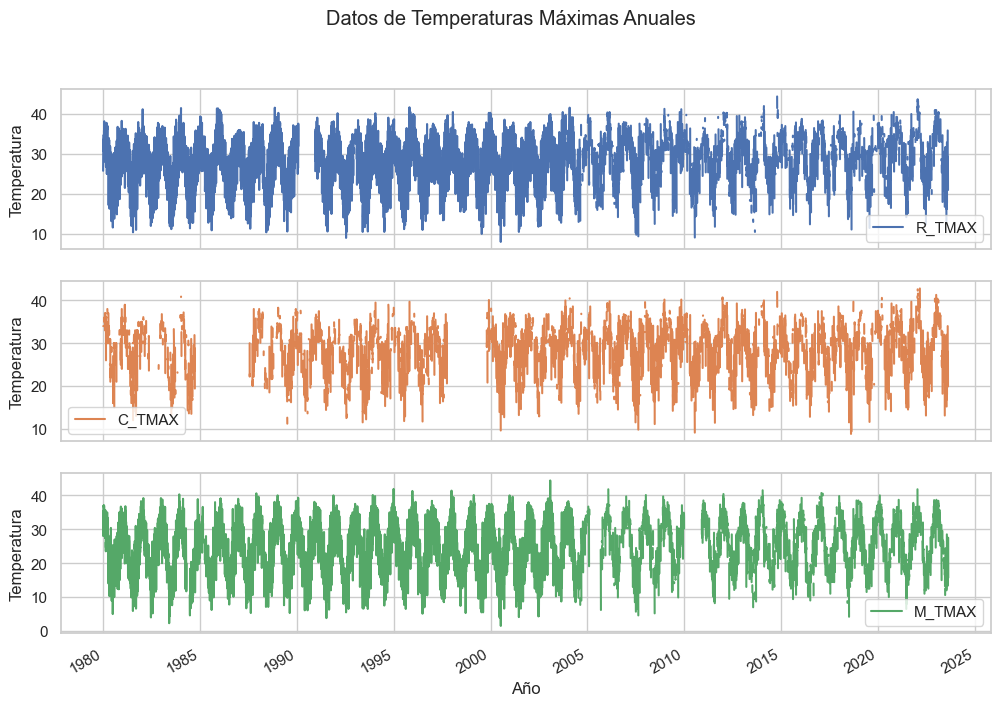

In [27]:
df_TMAX.plot(subplots=True, figsize=(12, 8), title='Datos de Temperaturas Máximas Anuales',xlabel='Año', ylabel='Temperatura')
plt.show()

Al haber muchos datos faltantes eliminamos con la función dropna(), la cual elimina la fila completa si alguna columna tiene un dato faltante

In [28]:
df_TMAX_copia = df_TMAX.dropna().copy()
df_TMAX_copia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3798 entries, 1980-01-05 to 2023-08-12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   R_TMAX  3798 non-null   float64
 1   C_TMAX  3798 non-null   float64
 2   M_TMAX  3798 non-null   float64
dtypes: float64(3)
memory usage: 118.7 KB


Al imprimir la información del dataframe nos damos cuenta de que perdemos demasiados datos porque la combinación de valores vacios hace que se eliminen la gran mayoria de filas,  por lo que decidimos realizar un método de imputación.

Recorremos los dataframe para las distintas temperaturas(TAVG,TMIN,TMAX) y filtramos por una cantidad mínima de datos en el año que consideramos que sea representativo para luego realizar la media de esos años y posteriormente imputar estos datos en las filas vacias.

In [29]:
year_con_datos_R = []
year_mean_R = []
year_con_datos_C = []
year_mean_C = []
year_con_datos_M = []
year_mean_M = []

year = np.arange(1980,2024,1)
for x in year:
    fecha_inicio = datetime.datetime(year=x, month=1, day=1)
    fecha_fin = datetime.datetime(year=x, month=12, day=31)
    df_TMAX_filtrar_R = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['R_TMAX'].count()
    df_TMAX_filtrar_C = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['C_TMAX'].count()
    df_TMAX_filtrar_M = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['M_TMAX'].count()
    if (df_TMAX_filtrar_R) > 200:
        df_TMAX_filtrar_R = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['R_TMAX'].mean()
        year_con_datos_R.append(x)
        year_mean_R.append(df_TMAX_filtrar_R)

    if (df_TMAX_filtrar_C) > 140:
        df_TMAX_filtrar_C = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['C_TMAX'].mean()
        year_con_datos_C.append(x)
        year_mean_C.append(df_TMAX_filtrar_C)

    if (df_TMAX_filtrar_M) > 200:
        df_TMAX_filtrar_M = df_TMAX[(df_TMAX.index >= fecha_inicio) & (df_TMAX.index <= fecha_fin)]['M_TMAX'].mean()
        year_con_datos_M.append(x)
        year_mean_M.append(df_TMAX_filtrar_M)

df_TMAX_original=df_TMAX.copy()

De este filtrado obtenemos una lista con los años y valores representativos, a estos mismo les hacemos el promedio que utilizaremos posteriormente para imputar en los espacios vacíos.

In [30]:
prom_M = np.mean(year_mean_M)
prom_R = np.mean(year_mean_R)
prom_C = np.mean(year_mean_C)
print(prom_M,prom_R,prom_C)


df_TMAX.loc[df_TMAX['R_TMAX'].isna(),'R_TMAX'] = prom_R #Reemplazamos todos los valores nulos por la media
df_TMAX.loc[df_TMAX['C_TMAX'].isna(),'C_TMAX'] = prom_C
df_TMAX.loc[df_TMAX['M_TMAX'].isna(),'M_TMAX'] = prom_M



24.066285898768125 27.186912308818894 28.44473505064348


Como comparación verificamos la descripción de los datos del dataframe de TMAX sin incorporar el promedio vs el dataframe original y no se observaron diferencias significativas.

In [31]:
df_TMAX_original.describe()

,R_TMAX,C_TMAX,M_TMAX
count,11625.000000,5678.000000,11969.000000
mean,27.779751,28.526277,24.573164
std,6.307448,6.127785,7.438931
min,8.000000,8.800000,1.500000
25%,23.300000,24.300000,18.700000
50%,28.500000,29.500000,25.000000
75%,32.600000,33.200000,30.700000
max,44.400000,42.800000,44.400000


In [32]:
df_TMAX.describe()

,R_TMAX,C_TMAX,M_TMAX
count,15940.000000,15940.000000,15940.000000
mean,27.619268,28.473781,24.446890
std,5.392866,3.657271,6.449734
min,8.000000,8.800000,1.500000
25%,25.500000,28.444735,20.700000
50%,27.186912,28.444735,24.066286
75%,31.000000,28.444735,29.000000
max,44.400000,42.800000,44.400000


Hacemos el mismo procedimiento para las Temperaturas Mínimas y medias.

In [33]:
year_con_datos_R = []
year_mean_R = []
year_con_datos_C = []
year_mean_C = []
year_con_datos_M = []
year_mean_M = []

year = np.arange(1980,2024,1)
for x in year:
    fecha_inicio = datetime.datetime(year=x, month=1, day=1)
    fecha_fin = datetime.datetime(year=x, month=12, day=31)
    df_TAVG_filtrar_R = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['R_TAVG'].count()
    df_TAVG_filtrar_C = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['C_TAVG'].count()
    df_TAVG_filtrar_M = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['M_TAVG'].count()
    if (df_TAVG_filtrar_R) > 300:
        df_TAVG_filtrar_R = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['R_TAVG'].mean()
        year_con_datos_R.append(x)
        year_mean_R.append(df_TAVG_filtrar_R)

    if (df_TAVG_filtrar_C) > 300:
        df_TAVG_filtrar_C = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['C_TAVG'].mean()
        year_con_datos_C.append(x)
        year_mean_C.append(df_TAVG_filtrar_C)

    if (df_TAVG_filtrar_M) > 300:
        df_TAVG_filtrar_M = df_TAVG[(df_TAVG.index >= fecha_inicio) & (df_TAVG.index <= fecha_fin)]['M_TAVG'].mean()
        year_con_datos_M.append(x)
        year_mean_M.append(df_TAVG_filtrar_M)

In [34]:
prom_M = np.mean(year_mean_M)
prom_R = np.mean(year_mean_R)
prom_C = np.mean(year_mean_C)
print(prom_M,prom_R,prom_C)

17.459358057257298 21.224189267840586 21.61246281630165


In [35]:
df_TAVG.loc[df_TAVG['R_TAVG'].isna(),'R_TAVG'] = prom_R #Reemplazamos todos los valores nulos por la media
df_TAVG.loc[df_TAVG['C_TAVG'].isna(),'C_TAVG'] = prom_C
df_TAVG.loc[df_TAVG['M_TAVG'].isna(),'M_TAVG'] = prom_M
df_TAVG.describe()

,R_TAVG,C_TAVG,M_TAVG
count,15940.000000,15940.000000,15940.000000
mean,21.239021,21.684446,17.464182
std,5.696161,5.449961,6.889493
min,3.100000,4.600000,-0.500000
25%,17.400000,18.100000,11.700000
50%,22.200000,22.200000,17.700000
75%,25.600000,25.800000,23.400000
max,36.900000,37.100000,33.200000


In [36]:
df_TMIN.describe()

,R_TMIN,C_TMIN,M_TMIN
count,14005.000000,10023.000000,14931.000000
mean,15.337751,15.652799,10.688588
std,6.185450,5.825637,6.892894
min,-4.700000,-1.900000,-7.500000
25%,11.500000,11.800000,4.900000
50%,16.500000,16.600000,10.900000
75%,20.000000,20.000000,16.600000
max,30.700000,31.000000,27.000000


In [37]:
year_con_datos_R = []
year_mean_R = []
year_con_datos_C = []
year_mean_C = []
year_con_datos_M = []
year_mean_M = []

year = np.arange(1980,2024,1)
for x in year:
    fecha_inicio = datetime.datetime(year=x, month=1, day=1)
    fecha_fin = datetime.datetime(year=x, month=12, day=31)
    df_TMIN_filtrar_R = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['R_TMIN'].count()
    df_TMIN_filtrar_C = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['C_TMIN'].count()
    df_TMIN_filtrar_M = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['M_TMIN'].count()
    if (df_TMIN_filtrar_R) > 300:
        df_TMIN_filtrar_R = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['R_TMIN'].mean()
        year_con_datos_R.append(x)
        year_mean_R.append(df_TMIN_filtrar_R)

    if (df_TMIN_filtrar_C) > 300:
        df_TMIN_filtrar_C = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['C_TMIN'].mean()
        year_con_datos_C.append(x)
        year_mean_C.append(df_TMIN_filtrar_C)

    if (df_TMIN_filtrar_M) > 300:
        df_TMIN_filtrar_M = df_TMIN[(df_TMIN.index >= fecha_inicio) & (df_TMIN.index <= fecha_fin)]['M_TMIN'].mean()
        year_con_datos_M.append(x)
        year_mean_M.append(df_TMIN_filtrar_M)

In [38]:
prom_M = np.mean(year_mean_M)
prom_R = np.mean(year_mean_R)
prom_C = np.mean(year_mean_C)
print(prom_M,prom_R,prom_C)

10.713183401617641 15.591869838456876 15.653224465174501


In [39]:
df_TMIN.loc[df_TMIN['R_TMIN'].isna(),'R_TMIN'] = prom_R #Reemplazamos todos los valores nulos por la media
df_TMIN.loc[df_TMIN['C_TMIN'].isna(),'C_TMIN'] = prom_C
df_TMIN.loc[df_TMIN['M_TMIN'].isna(),'M_TMIN'] = prom_M
df_TMIN.describe()

,R_TMIN,C_TMIN,M_TMIN
count,15940.000000,15940.000000,15940.000000
mean,15.368599,15.652957,10.690144
std,5.798441,4.619448,6.671157
min,-4.700000,-1.900000,-7.500000
25%,12.400000,14.900000,5.200000
50%,15.591870,15.653224,10.713183
75%,19.600000,18.000000,16.200000
max,30.700000,31.000000,27.000000


Luego de estas imputaciones de datos estamos preparados para realizar la matriz de covarianza de cada tipo de temperatura entre las distintas ciudades

In [40]:
covarianza_TMAX = np.cov(df_TMAX)
covarianza_TMAX

array([[ 17.06075653,  11.58641493,  10.09325823, ...,  -1.01146572,
        -27.48972309,  -7.63934437],
       [ 11.58641493,   8.45540666,   8.39891663, ...,  -1.25881665,
        -20.06838986,  -6.17536207],
       [ 10.09325823,   8.39891663,  10.03575993, ...,  -2.10359555,
        -19.94618033,  -7.11793145],
       ...,
       [ -1.01146572,  -1.25881665,  -2.10359555, ...,   0.6173856 ,
          2.9937043 ,   1.41518342],
       [-27.48972309, -20.06838986, -19.94618033, ...,   2.9937043 ,
         47.63117742,  14.66373941],
       [ -7.63934437,  -6.17536207,  -7.11793145, ...,   1.41518342,
         14.66373941,   5.08187404]])

In [41]:
cov_matrix = df_TMAX[['R_TMAX', 'C_TMAX', 'M_TMAX']].cov()
cov_matrix

,R_TMAX,C_TMAX,M_TMAX
R_TMAX,29.083008,11.863079,19.631610
C_TMAX,11.863079,13.375634,7.732948
M_TMAX,19.631610,7.732948,41.599072


In [42]:
cov_matrix_TMIN = df_TMIN[['R_TMIN', 'C_TMIN', 'M_TMIN']].cov()
cov_matrix_TMIN

,R_TMIN,C_TMIN,M_TMIN
R_TMIN,33.621923,20.474074,25.955135
C_TMIN,20.474074,21.339304,18.348813
M_TMIN,25.955135,18.348813,44.504329


In [43]:
cov_matrix_TAVG = df_TAVG[['R_TAVG', 'C_TAVG', 'M_TAVG']].cov()
cov_matrix_TAVG

,R_TAVG,C_TAVG,M_TAVG
R_TAVG,32.446250,29.902166,30.881141
C_TAVG,29.902166,29.702070,29.211512
M_TAVG,30.881141,29.211512,47.465120


Text(0.5, 1.0, 'Covarianza de la temperatura promedio')

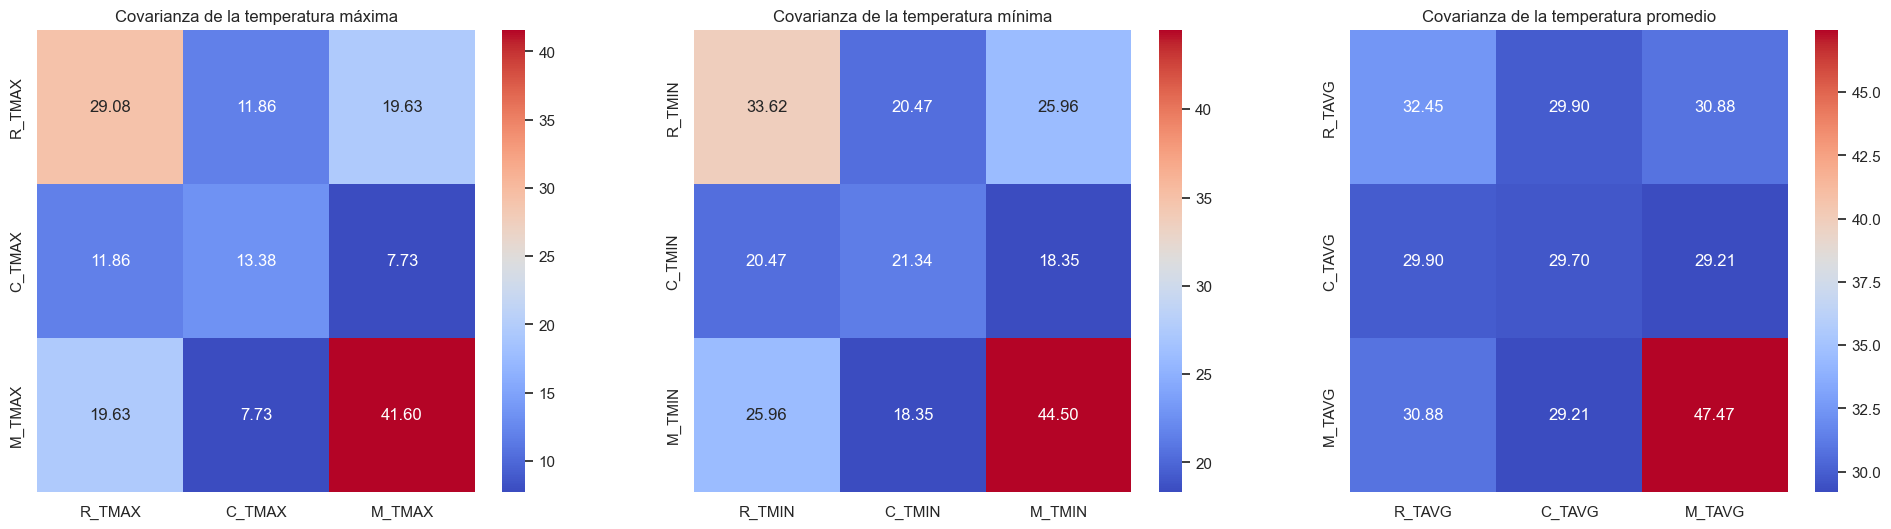

In [44]:
# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Graficar el primer heatmap
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[0])
axes[0].set_title('Covarianza de la temperatura máxima')


# Graficar el segundo heatmap
sns.heatmap(cov_matrix_TMIN, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[1])
axes[1].set_title('Covarianza de la temperatura mínima')


# Graficar el tercer heatmap
sns.heatmap(cov_matrix_TAVG, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[2])
axes[2].set_title('Covarianza de la temperatura promedio')


Análisis de Covarianza:
Podemos observar las distintas relaciones de covarianza, nos da una idea de la dirección que toman las variables pero no podemos obtener una relación de fuerza

La conclusiones es que las temperaturas anuales tanto máximas, mínimas y medias de las distintas ciudades tienden a subir en conjunto ya que todos los valores son positivos.

A continuación haremos la correlación para identificar cuando es una relación mas fuerte que otra.  

In [45]:
correlacion_TMAX = df_TMAX.corr()
correlacion_TMIN = df_TMIN.corr()
correlacion_TAVG = df_TAVG.corr()

In [46]:
print(correlacion_TMAX)

          R_TMAX    C_TMAX    M_TMAX
R_TMAX  1.000000  0.601479  0.564410
C_TMAX  0.601479  1.000000  0.327828
M_TMAX  0.564410  0.327828  1.000000


In [47]:
print(correlacion_TMIN)

          R_TMIN    C_TMIN    M_TMIN
R_TMIN  1.000000  0.764369  0.670982
C_TMIN  0.764369  1.000000  0.595411
M_TMIN  0.670982  0.595411  1.000000


In [48]:
print(correlacion_TAVG)

          R_TAVG    C_TAVG    M_TAVG
R_TAVG  1.000000  0.963223  0.786908
C_TAVG  0.963223  1.000000  0.777989
M_TAVG  0.786908  0.777989  1.000000


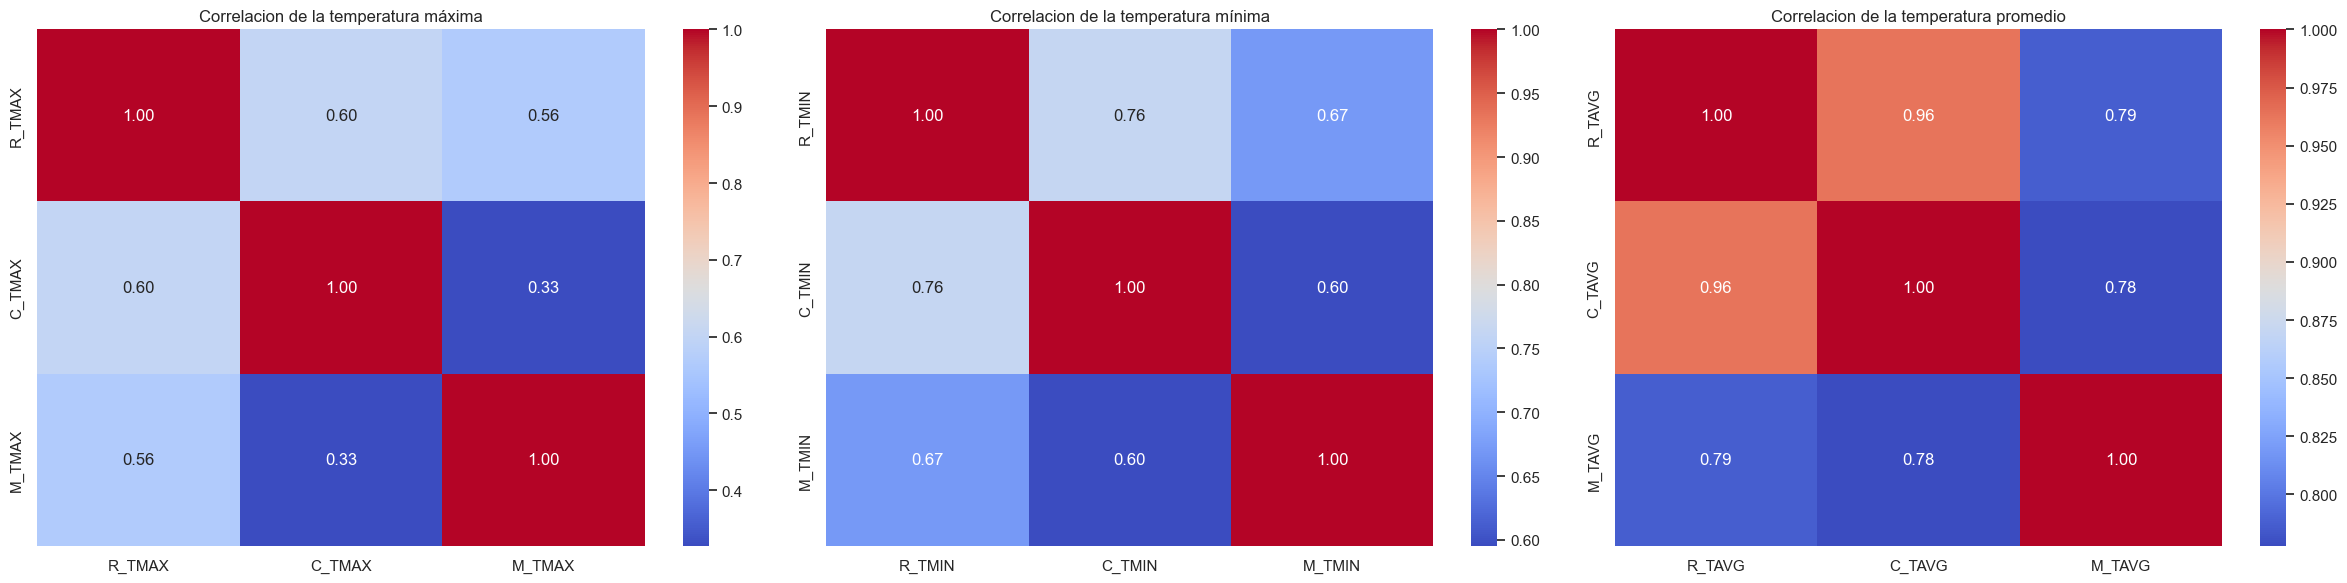

In [49]:
# Crear la figura y los ejes para los subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Graficar el primer heatmap
sns.heatmap(correlacion_TMAX, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[0], xticklabels=correlacion_TMAX.index.values, yticklabels=correlacion_TMAX.index.values)
axes[0].set_title('Correlacion de la temperatura máxima')


# Graficar el segundo heatmap
sns.heatmap(correlacion_TMIN, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[1], xticklabels=correlacion_TMIN.index.values, yticklabels=correlacion_TMIN.index.values)
axes[1].set_title('Correlacion de la temperatura mínima')


# Graficar el tercer heatmap
sns.heatmap(correlacion_TAVG, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, ax=axes[2], xticklabels=correlacion_TAVG.index.values, yticklabels=correlacion_TAVG.index.values)
axes[2].set_title('Correlacion de la temperatura promedio')

plt.tight_layout()
plt.show()

De esta matriz de correlación podemos identificar a parte de la dirección una magnitud de fuerza.
por ejemplo vemos que temperatura máxima entre resistencia y corrientes es de 0.60 y la relación de Corrientes y Mendoza es de 0.33, esto nos indica que ambas correlaciones al ser positivas, cuando una aumenta la otra también pero hay mayor correlación entre Resistencia y corrientes que Corrientes y Mendoza, tiene sentido ya que resistencia y corrientes están próximas geográficamente.

A continuación haremos un análisis de correlación entre temperaturas y precipitaciones agrupando los datos anualmente, el análisis se realizará para cada ciudad.

In [50]:
datos_correlacion_R = pd.merge(df_anual_resistencia, df_TMAX["R_TMAX"], left_index=True, right_index=True, how='inner')
datos_correlacion_R = pd.merge(datos_correlacion_R, df_TMIN["R_TMIN"], left_index=True, right_index=True, how='inner')
datos_correlacion_R = pd.merge(datos_correlacion_R, df_TAVG["R_TAVG"], left_index=True, right_index=True, how='inner')

In [51]:
datos_correlacion_R

,PRCP,R_TMAX,R_TMIN,R_TAVG
DATE,,,,
1980-12-31,1275.1,35.100000,23.60000,27.4
1981-12-31,1011.6,34.500000,20.20000,26.7
1982-12-31,1443.1,34.500000,22.20000,27.0
1983-12-31,1528.6,37.400000,24.00000,28.4
1984-12-31,1578.1,34.200000,18.60000,25.1
1985-12-31,0.0,36.300000,22.40000,29.7
1986-12-31,3.0,36.000000,22.20000,30.2
1987-12-31,943.2,32.300000,16.30000,23.7
1988-12-31,782.0,35.000000,17.30000,26.5


In [52]:
datos_correlacion_C = pd.merge(df_anual_corrientes, df_TMAX["C_TMAX"], left_index=True, right_index=True, how='inner')
datos_correlacion_C = pd.merge(datos_correlacion_C, df_TMIN["C_TMIN"], left_index=True, right_index=True, how='inner')
datos_correlacion_C = pd.merge(datos_correlacion_C, df_TAVG["C_TAVG"], left_index=True, right_index=True, how='inner')

In [53]:
datos_correlacion_M = pd.merge(df_anual_mendoza, df_TMAX["M_TMAX"], left_index=True, right_index=True, how='inner')
datos_correlacion_M = pd.merge(datos_correlacion_M, df_TMIN["M_TMIN"], left_index=True, right_index=True, how='inner')
datos_correlacion_M = pd.merge(datos_correlacion_M, df_TAVG["M_TAVG"], left_index=True, right_index=True, how='inner')

In [54]:
correlacion_Resistencia = datos_correlacion_R.corr()
correlacion_Corrientes = datos_correlacion_C.corr()
correlacion_Mendoza = datos_correlacion_M.corr()

In [55]:
datos_correlacion_R.head(10)

,PRCP,R_TMAX,R_TMIN,R_TAVG
DATE,,,,
1980-12-31,1275.1,35.1,23.6,27.4
1981-12-31,1011.6,34.5,20.2,26.7
1982-12-31,1443.1,34.5,22.2,27.0
1983-12-31,1528.6,37.4,24.0,28.4
1984-12-31,1578.1,34.2,18.6,25.1
1985-12-31,0.0,36.3,22.4,29.7
1986-12-31,3.0,36.0,22.2,30.2
1987-12-31,943.2,32.3,16.3,23.7
1988-12-31,782.0,35.0,17.3,26.5


In [56]:
correlacion_Resistencia.head()

,PRCP,R_TMAX,R_TMIN,R_TAVG
PRCP,1.000000,-0.053401,0.046273,-0.098678
R_TMAX,-0.053401,1.000000,-0.180807,0.385408
R_TMIN,0.046273,-0.180807,1.000000,0.358198
R_TAVG,-0.098678,0.385408,0.358198,1.000000


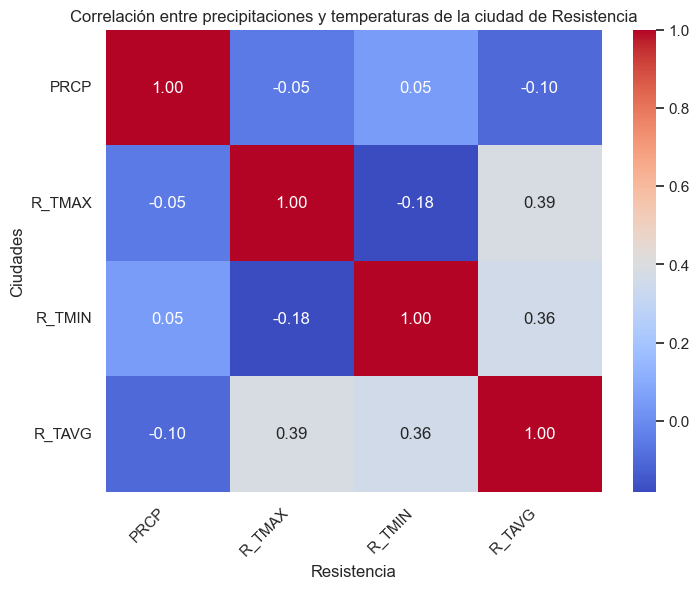

In [57]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlacion_Resistencia, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas de la ciudad de Resistencia')
plt.xlabel('Resistencia')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación para la ciudad de Resistencia podemos identificar:

Que la correlación entre precipitación y temperatura máxima y media es negativa débil en cambio con la mínima es positiva débil

Que la correlación entre temperatura media con la máxima y la mínima es moderada débil, en cambio entre la mínima y máxima es negativa débil.

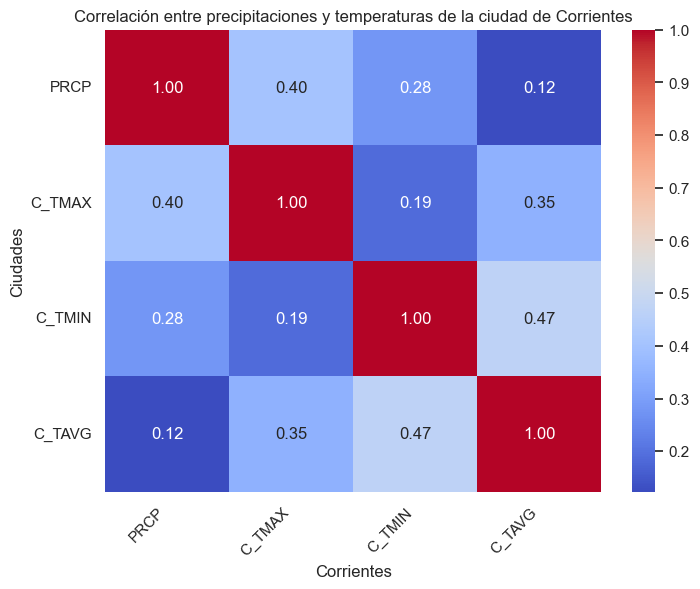

In [58]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlacion_Corrientes, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas de la ciudad de Corrientes')
plt.xlabel('Corrientes')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación para la ciudad de Corrientes podemos identificar:

Que la correlación entre precipitación y temperatura máxima es mayor que entre temperaturas medias y mínimas.

Que la correlación entre temperatura mínima y media es mayor que entre temperaturas mínima y máxima.

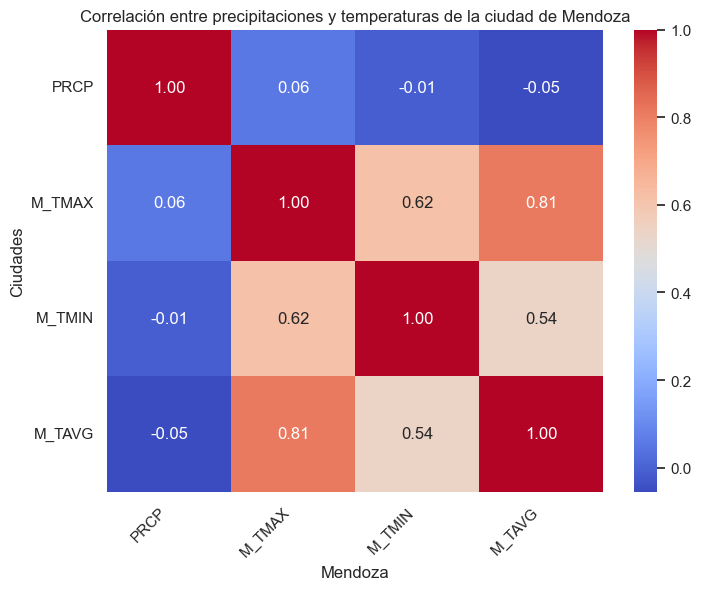

In [59]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlacion_Mendoza, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas de la ciudad de Mendoza')
plt.xlabel('Mendoza')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación par ala ciudad de Mendoza podemos identificar:

Que la correlación entre precipitación y temperaturas  es cercana a cero, si bien podemos observar que la mínima y media son levemente negativas por lo que implica una relación inversa.

Que la correlación entre temperaturas es moderada entre mínima y máxima y moderada fuerte entre máxima y media

A continuación realizamos un grafico de dispersión entre las variables de temperatura media y máxima para visualizar con mayor detalle esta relación de la matriz que se realizo anteriormente.

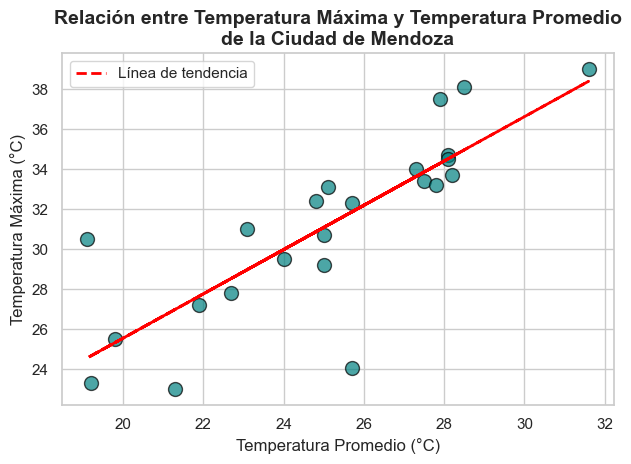

El valor de correlación es de: 


0.8138046784677586

In [60]:

# Plotear los datos
plt.scatter(
    datos_correlacion_M["M_TAVG"],
    datos_correlacion_M["M_TMAX"],
    color='teal',  # Color de los puntos
    edgecolor='black',  # Color del borde de los puntos
    alpha=0.7,  # Transparencia de los puntos
    s=100  # Tamaño de los puntos
)

# Configurar el título y las etiquetas de los ejes
plt.title(
    'Relación entre Temperatura Máxima y Temperatura Promedio\n'
    'de la Ciudad de Mendoza',
    fontsize=14,  # Tamaño de fuente del título
    fontweight='bold'  # Peso de la fuente del título
)
plt.xlabel('Temperatura Promedio (°C)', fontsize=12)
plt.ylabel('Temperatura Máxima (°C)', fontsize=12)

# Añadir una línea de tendencia (opcional)
# Ajustar una línea de regresión a los datos

m, b = np.polyfit(datos_correlacion_M["M_TAVG"], datos_correlacion_M["M_TMAX"], 1)
plt.plot(
    datos_correlacion_M["M_TAVG"],
    m * datos_correlacion_M["M_TAVG"] + b,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Línea de tendencia'
)

# Añadir una leyenda
plt.legend()

# Configurar el diseño del gráfico para evitar el recorte
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print(f"El valor de correlación es de: ")
correlacion_Mendoza["M_TMAX"]["M_TAVG"]

A continuación realizamos un grafico scatter entre las variables de precipitaciones y temperatura máxima para visualizar con mayor detalle esta relación en la matriz que se realizo anteriormente.

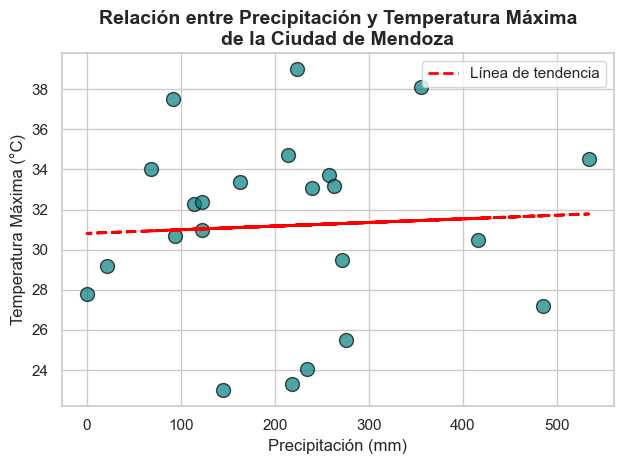

El valor de correlación es de:


0.055144737112183186

In [61]:

# Plotear los datos
plt.scatter(
    datos_correlacion_M["PRCP"],
    datos_correlacion_M["M_TMAX"],
    color='teal',  # Color de los puntos
    edgecolor='black',  # Color del borde de los puntos
    alpha=0.7,  # Transparencia de los puntos
    s=100  # Tamaño de los puntos
)

# Configurar el título y las etiquetas de los ejes
plt.title(
    'Relación entre Precipitación y Temperatura Máxima\n'
    'de la Ciudad de Mendoza',
    fontsize=14,  # Tamaño de fuente del título
    fontweight='bold'  # Peso de la fuente del título
)
plt.xlabel('Precipitación (mm)', fontsize=12)
plt.ylabel('Temperatura Máxima (°C)', fontsize=12)

# Añadir una línea de tendencia (opcional)
# Ajustar una línea de regresión a los datos

m, b = np.polyfit(datos_correlacion_M["PRCP"], datos_correlacion_M["M_TMAX"], 1)
plt.plot(
    datos_correlacion_M["PRCP"],
    m * datos_correlacion_M["PRCP"] + b,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Línea de tendencia'
)

# Añadir una leyenda
plt.legend()

# Configurar el diseño del gráfico para evitar el recorte
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print(f"El valor de correlación es de:")
correlacion_Mendoza["PRCP"]["M_TMAX"]

A continuación realizaremos un análisis extra para analizar la correlación entre precipitaciones y temperaturas en la ciudad de Resistencia pero agrupadas por estaciones (otoño,invierno,primavera y verano)


In [62]:

df_resistencia_extra = df_resistencia.drop([ 'NAME', 'Unnamed: 0'], axis = 1).copy()
df_resistencia_extra.head()

df_resistencia_extra['TMAX'] = df_resistencia_extra['TMAX'].interpolate(method='linear')
df_resistencia_extra['TMIN'] = df_resistencia_extra['TMIN'].interpolate(method='linear')
df_resistencia_extra['TAVG'] = df_resistencia_extra['TAVG'].interpolate(method='linear')



df_mensual_resistencia = df_resistencia_extra.resample('ME').agg({
    'PRCP': 'sum',
    'TAVG': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
})
df_anual_resistencia = df_resistencia_extra.resample('YE').agg({
    'PRCP': 'sum',
    'TAVG': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
})
df_resistencia_extra.dropna()
df_mensual_resistencia=df_mensual_resistencia.dropna()
df_anual_resistencia=df_anual_resistencia.dropna()

In [63]:
df_anual_resistencia

,PRCP,TAVG,TMAX,TMIN
DATE,,,,
1980-12-31,1275.1,20.725074,27.123009,15.301180
1981-12-31,1011.6,20.864140,27.120117,15.739942
1982-12-31,1443.1,22.238202,28.570225,16.754494
1983-12-31,1528.6,20.470423,26.535211,15.070423
1984-12-31,1578.1,20.680277,26.376817,15.753633
1985-12-31,0.0,22.543750,29.613068,16.114205
1986-12-31,3.0,21.992617,28.493960,16.020805
1987-12-31,943.2,20.539583,26.620417,14.637083
1988-12-31,782.0,20.671972,27.293426,14.400346


Para este análisis tomamos los últimos 23 años.

In [64]:
años_a_eliminar=[]
for x in df_mensual_resistencia.index:
    if(x.year<2000):
        años_a_eliminar.append(x)

df_mensual_resistencia=df_mensual_resistencia.drop(años_a_eliminar)


años_a_eliminar_a=[]
for x in df_anual_resistencia.index:
    if(x.year<2000):
        años_a_eliminar_a.append(x)

df_anual_resistencia=df_anual_resistencia.drop(años_a_eliminar_a)

años_a_eliminar=[]
for x in df_resistencia.index:
    if(x.year<2000):
        años_a_eliminar.append(x)

df_resistencia=df_resistencia.drop(años_a_eliminar)

In [65]:
df_mensual_resistencia
df_estacion_resistencia=df_mensual_resistencia.copy()

Creamos una columna con el tipo de estación meteorológica para luego poder separar los datos y agruparlos:

1 - Otoño
2 - Invierno
3 - Primavera
4 - Verano

In [66]:

# Definir una función para asignar estaciones
def asignar_estacion(mes):
    if mes in [3, 4, 5]:
        return 1
    elif mes in [6, 7, 8]:
        return 2
    elif mes in [9, 10, 11]:
        return 3
    else:
        return 4

# Agregar una columna con la estación
df_estacion_resistencia['estacion'] = df_estacion_resistencia.index.month.map(asignar_estacion)



In [67]:
df_estacion_resistencia.head(20)

,PRCP,TAVG,TMAX,TMIN,estacion
DATE,,,,,
2000-01-31,103.0,26.213333,32.566667,19.906667,4
2000-02-29,110.8,25.300000,29.275000,21.450000,4
2000-03-31,41.2,22.560000,27.730000,18.590000,1
2000-04-30,53.8,20.350000,23.275000,18.175000,1
2000-05-31,38.1,16.685714,20.257143,13.357143,1
2000-06-30,25.2,17.811111,21.655556,14.433333,2
2000-07-31,1.6,9.900000,14.850000,5.375000,2
2000-08-31,0.8,10.800000,14.100000,8.650000,2
2000-09-30,7.9,14.375000,18.925000,9.725000,3


creamos por cada estación un dataframe distinto y realizamos la correlación.

In [68]:
df_estacion_1_resistencia=df_estacion_resistencia[df_estacion_resistencia['estacion']==1].copy()
df_estacion_1_resistencia=df_estacion_1_resistencia.drop(['estacion'], axis=1)
corr_estacion_1_resistencia=df_estacion_1_resistencia.corr()

In [69]:
df_estacion_2_resistencia=df_estacion_resistencia[df_estacion_resistencia['estacion']==2].copy()
df_estacion_2_resistencia=df_estacion_2_resistencia.drop(['estacion'], axis=1)
corr_estacion_2_resistencia=df_estacion_2_resistencia.corr()

In [70]:
df_estacion_3_resistencia=df_estacion_resistencia[df_estacion_resistencia['estacion']==3].copy()
df_estacion_3_resistencia=df_estacion_3_resistencia.drop(['estacion'], axis=1)
corr_estacion_3_resistencia=df_estacion_3_resistencia.corr()


In [71]:
corr_estacion_3_resistencia.head()

,PRCP,TAVG,TMAX,TMIN
PRCP,1.000000,0.541107,0.391948,0.491866
TAVG,0.541107,1.000000,0.778846,0.926903
TMAX,0.391948,0.778846,1.000000,0.653114
TMIN,0.491866,0.926903,0.653114,1.000000


In [72]:
df_estacion_4_resistencia=df_estacion_resistencia[df_estacion_resistencia['estacion']==4].copy()
df_estacion_4_resistencia=df_estacion_4_resistencia.drop(['estacion'], axis=1)
corr_estacion_4_resistencia=df_estacion_4_resistencia.corr()


In [73]:
corr_estacion_4_resistencia.head()

,PRCP,TAVG,TMAX,TMIN
PRCP,1.000000,-0.020469,-0.054674,0.180552
TAVG,-0.020469,1.000000,0.533430,0.709588
TMAX,-0.054674,0.533430,1.000000,0.179781
TMIN,0.180552,0.709588,0.179781,1.000000


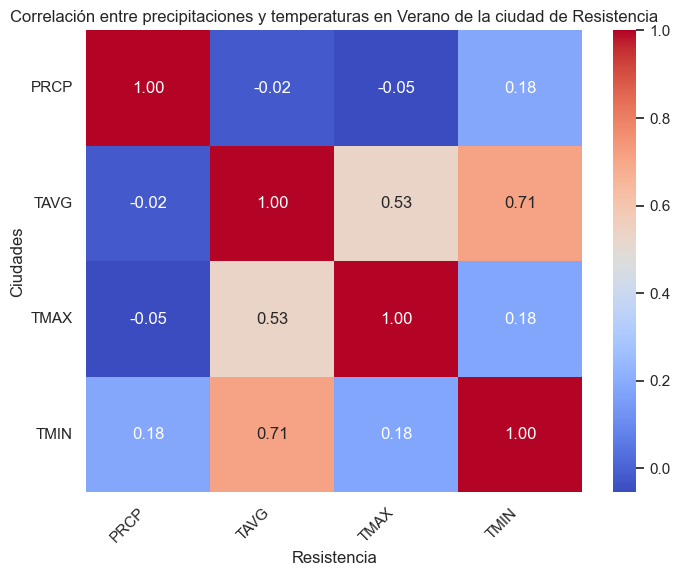

In [74]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_estacion_4_resistencia, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas en Verano de la ciudad de Resistencia')
plt.xlabel('Resistencia')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación de la estación de Verano podemos observar:

Que existe una mayor correlación entre precipitación y temperaturas mínima  que entre precipitación y media y máxima, si bien podemos observar que la media y máxima son levemente negativas por lo que implica una relación inversa pero cercana a cero.

Que la correlación entre temperaturas es moderada entre media y máxima y moderada fuerte entre media y mínima y entre mínima y máxima débil

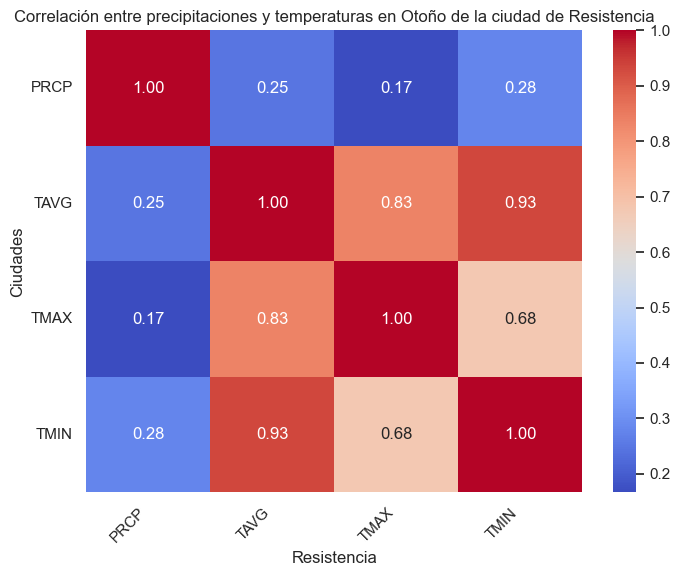

In [75]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_estacion_1_resistencia, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas en Otoño de la ciudad de Resistencia')
plt.xlabel('Resistencia')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación de la estación de Otoño podemos observar:

Que existe una correlación moderada débil positiva entre la precipitación y las temperaturas en general.

Que la correlación entre temperaturas es moderada fuerte positiva entre las distintas temperaturas

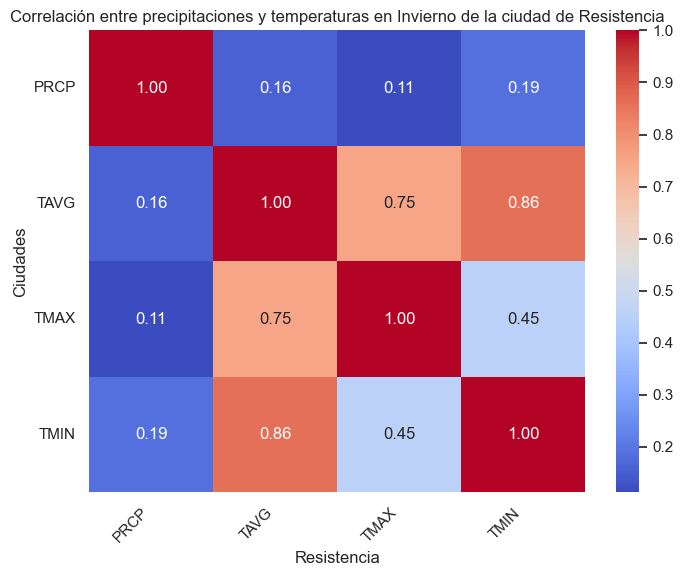

In [76]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_estacion_2_resistencia, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas en Invierno de la ciudad de Resistencia')
plt.xlabel('Resistencia')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación de la estación de Otoño podemos observar:

Que existe una correlación moderada débil positiva entre la precipitación y las temperaturas en general.

Que la correlación entre temperaturas es moderada positiva entre las distintas temperaturas

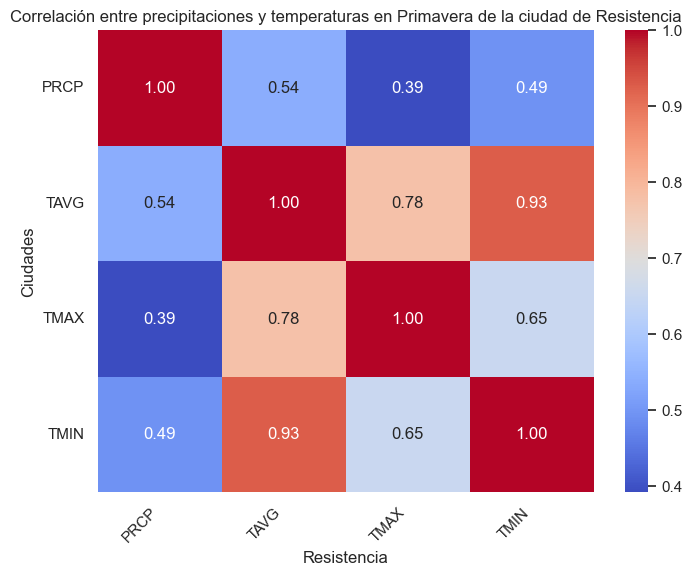

In [77]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_estacion_3_resistencia, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Añadir rótulos y título
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.title('Correlación entre precipitaciones y temperaturas en Primavera de la ciudad de Resistencia')
plt.xlabel('Resistencia')
plt.ylabel('Ciudades')

# Mostrar el gráfico
plt.show()

De esta matriz de correlación de la estación de Primavera podemos observar:

Que existe una correlación moderada positiva entre la precipitación y las temperaturas en general.

Que la correlación entre temperaturas es moderada fuerte positiva entre las distintas temperaturas

A continuación realizamos un grafico scatter entre las variables de precipitación y temperatura media de la estación de Primavera para visualizar con mayor detalle esta relación en la matriz que se realizo anteriormente.

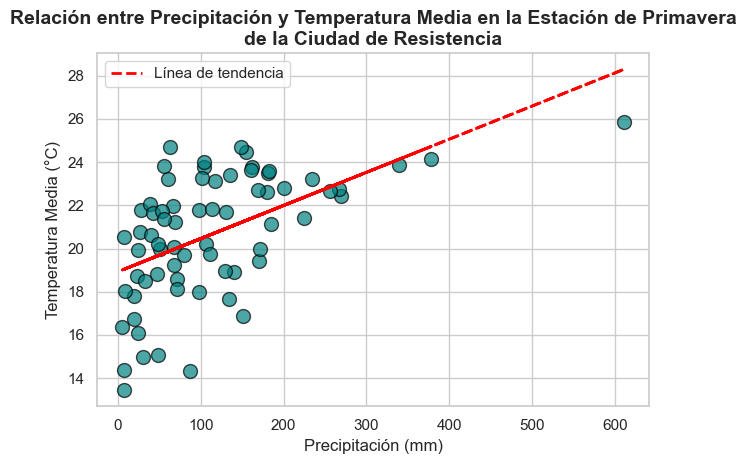

El valor de correlación es de:


0.5411070669431629

In [78]:

# Plotear los datos
plt.scatter(
    df_estacion_3_resistencia["PRCP"],
    df_estacion_3_resistencia["TAVG"],
    color='teal',  # Color de los puntos
    edgecolor='black',  # Color del borde de los puntos
    alpha=0.7,  # Transparencia de los puntos
    s=100  # Tamaño de los puntos
)

# Configurar el título y las etiquetas de los ejes
plt.title(
    'Relación entre Precipitación y Temperatura Media en la Estación de Primavera\n'
    'de la Ciudad de Resistencia',
    fontsize=14,  # Tamaño de fuente del título
    fontweight='bold'  # Peso de la fuente del título
)
plt.xlabel('Precipitación (mm)', fontsize=12)
plt.ylabel('Temperatura Media (°C)', fontsize=12)

# Añadir una línea de tendencia (opcional)
# Ajustar una línea de regresión a los datos

m, b = np.polyfit(df_estacion_3_resistencia["PRCP"], df_estacion_3_resistencia["TAVG"], 1)
plt.plot(
    df_estacion_3_resistencia["PRCP"],
    m * df_estacion_3_resistencia["PRCP"] + b,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Línea de tendencia'
)

# Añadir una leyenda
plt.legend()

# Configurar el diseño del gráfico para evitar el recorte
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print(f"El valor de correlación es de:")
corr_estacion_3_resistencia["PRCP"]["TAVG"]

Realizamos un grafico scatter entre las variables de precipitación y temperatura media de la estación de Verano para visualizar con mayor detalle esta relación en la matriz que se realizo anteriormente.

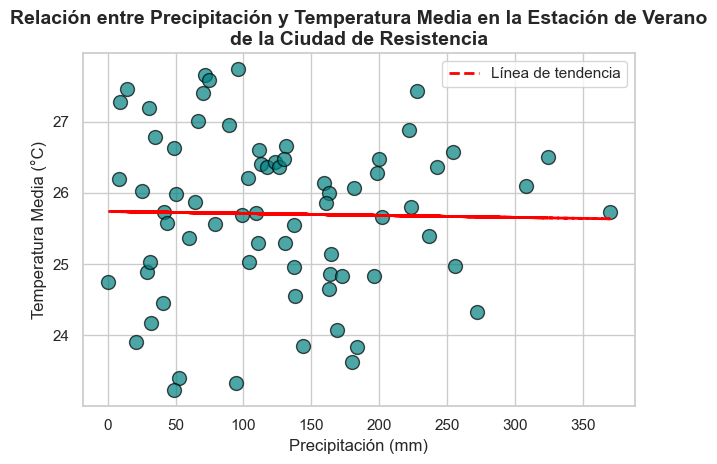

El valor de correlación es de:


-0.02046879394900464

In [79]:
# Plotear los datos
plt.scatter(
    df_estacion_4_resistencia["PRCP"],
    df_estacion_4_resistencia["TAVG"],
    color='teal',  # Color de los puntos
    edgecolor='black',  # Color del borde de los puntos
    alpha=0.7,  # Transparencia de los puntos
    s=100  # Tamaño de los puntos
)

# Configurar el título y las etiquetas de los ejes
plt.title(
    'Relación entre Precipitación y Temperatura Media en la Estación de Verano\n'
    'de la Ciudad de Resistencia',
    fontsize=14,  # Tamaño de fuente del título
    fontweight='bold'  # Peso de la fuente del título
)
plt.xlabel('Precipitación (mm)', fontsize=12)
plt.ylabel('Temperatura Media (°C)', fontsize=12)

# Añadir una línea de tendencia (opcional)
# Ajustar una línea de regresión a los datos

m, b = np.polyfit(df_estacion_4_resistencia["PRCP"], df_estacion_4_resistencia["TAVG"], 1)
plt.plot(
    df_estacion_4_resistencia["PRCP"],
    m * df_estacion_4_resistencia["PRCP"] + b,
    color='red',
    linestyle='--',
    linewidth=2,
    label='Línea de tendencia'
)

# Añadir una leyenda
plt.legend()

# Configurar el diseño del gráfico para evitar el recorte
plt.tight_layout()

# Mostrar el gráfico
plt.show()
print(f"El valor de correlación es de:")
corr_estacion_4_resistencia["PRCP"]["TAVG"]

### **Analizaremos la regresión de la precipitaciones de la ciudad de Resistencia**

Las series de tiempo se componen por lo general de 4 componentes:
* Tendencia: la evolución a largo plazo de la serie.
* Estacionalidad: movimientos de corto plazo que se repiten de forma periódica.
* Ciclo: oscilaciones periódicas de mediano plazo. Generalmente se pueden analizar como oscilaciones alrededor de la tendencia.
* Componente aleatorio o irregular: todo lo que no se puede explicar en los anteriores items.


Creamos una columna con la tendencia , tendencia al cuadrado, tendencia al cubo que utilizaremos para identificar la tendencia en la regresión de la serie

In [80]:
df_mensual_resistencia['tendencia'] = np.arange(1, len(df_mensual_resistencia)+1)
df_mensual_resistencia['tendencia_cuadrado']=df_mensual_resistencia['tendencia']**2
df_mensual_resistencia['tendencia_cubo']=df_mensual_resistencia['tendencia']**3
X = df_mensual_resistencia['tendencia']

In [81]:
#mensual
X = sm.add_constant(X)
y = df_mensual_resistencia['PRCP']
reg_tend1 = sm.OLS(y,X).fit()
preds_tend1 = reg_tend1.predict(X)
reg_tend1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRCP   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.569
Date:                Tue, 30 Jul 2024   Prob (F-statistic):             0.0599
Time:                        09:29:40   Log-Likelihood:                -1678.7
No. Observations:                 284   AIC:                             3361.
Df Residuals:                     282   BIC:                             3369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.5189     10.664      7.457      0.000      58.529     100.509
tendencia      0.1225      0.065      1.889      0.060      -0.005       0.250
==============================================================================
Omnibus:                      103.391   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.865
Skew:                           1.589   Prob(JB):                     1.58e-74
Kurtosis:                       7.315   Cond. No.                         330.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

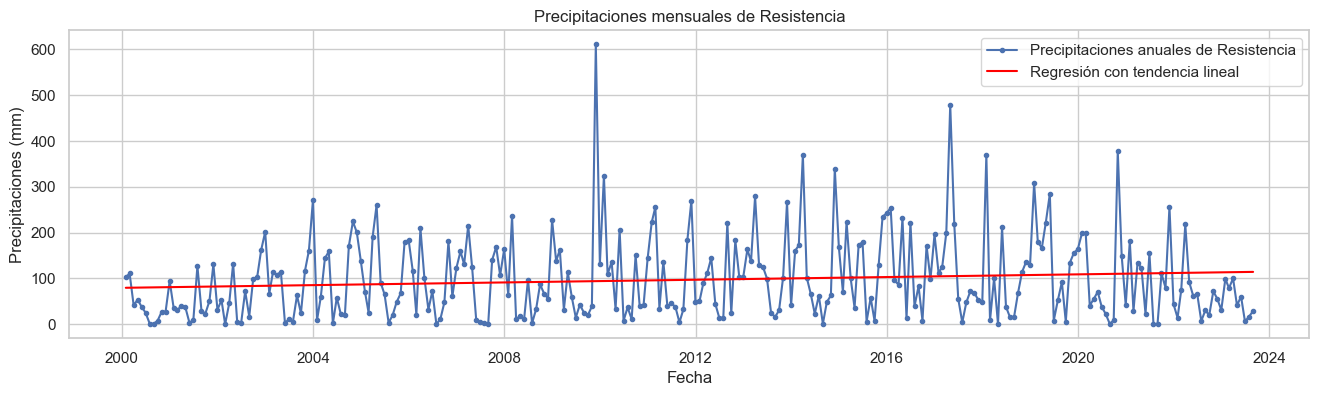

In [82]:
plt.figure(figsize=(16, 4))
plt.plot(df_mensual_resistencia.index, df_mensual_resistencia.PRCP, marker='.', linestyle='-', label='Precipitaciones anuales de Resistencia')
plt.plot(df_mensual_resistencia.index, preds_tend1, color="red", label="Regresión con tendencia lineal")
plt.title('Precipitaciones mensuales de Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precipitaciones (mm)')
plt.legend()
plt.show()

Agregamos las dummies de estacionalidad por año y por mes para captar mejor los picos

In [83]:
df_mensual_resistencia['año'] = df_mensual_resistencia.index.year
df_mensual_resistencia['mes'] = df_mensual_resistencia.index.month


In [84]:
df_mensual_resistencia['mes'].head(20)

DATE
2000-01-31     1
2000-02-29     2
2000-03-31     3
2000-04-30     4
2000-05-31     5
2000-06-30     6
2000-07-31     7
2000-08-31     8
2000-09-30     9
2000-10-31    10
2000-11-30    11
2000-12-31    12
2001-01-31     1
2001-02-28     2
2001-03-31     3
2001-04-30     4
2001-05-31     5
2001-06-30     6
2001-07-31     7
2001-08-31     8
Name: mes, dtype: int32

In [85]:
df_mensual_resistencia = pd.get_dummies(df_mensual_resistencia, columns=['año'], drop_first=True, dtype=int)
df_mensual_resistencia = pd.get_dummies(df_mensual_resistencia, columns=['mes'], drop_first=False, dtype=int)


In [86]:
print(df_mensual_resistencia.head(30))

             PRCP       TAVG       TMAX       TMIN  tendencia  \
DATE                                                            
2000-01-31  103.0  26.213333  32.566667  19.906667          1   
2000-02-29  110.8  25.300000  29.275000  21.450000          2   
2000-03-31   41.2  22.560000  27.730000  18.590000          3   
2000-04-30   53.8  20.350000  23.275000  18.175000          4   
2000-05-31   38.1  16.685714  20.257143  13.357143          5   
2000-06-30   25.2  17.811111  21.655556  14.433333          6   
2000-07-31    1.6   9.900000  14.850000   5.375000          7   
2000-08-31    0.8  10.800000  14.100000   8.650000          8   
2000-09-30    7.9  14.375000  18.925000   9.725000          9   
2000-10-31   27.2  20.775000  23.925000  17.975000         10   
2000-11-30   27.7  21.800000  29.175000  16.600000         11   
2000-12-31   94.4  23.325000  28.862500  18.362500         12   
2001-01-31   34.8  26.790000  32.070000  22.630000         13   
2001-02-28   30.8  27.187

Ejecutamos la función de regresión de la librería statsmodels utilizando la tendencia lineal,cuadratica,cubica y las dummies mensuales y anuales y vemos los resultados.

In [87]:
estacionalidad=[]
estacionalidad.append('tendencia')
estacionalidad.append('tendencia_cuadrado')
estacionalidad.append('tendencia_cubo')

for x in range(1,13,1):
    y=f"mes_{x}"
    estacionalidad.append(y)

for x in range(df_anual_resistencia.index.year.min()+1,df_anual_resistencia.index.year.max()+1,1):
    y=f"año_{x}"
    estacionalidad.append(y)


X = df_mensual_resistencia[estacionalidad]
X = sm.add_constant(X)
y = df_mensual_resistencia['PRCP']

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRCP   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     3.563
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           1.95e-09
Time:                        09:29:41   Log-Likelihood:                -1621.1
No. Observations:                 284   AIC:                             3316.
Df Residuals:                     247   BIC:                             3451.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8655     30.250      0.029      0.977     -58.716      60.447
tendencia              6.9835      3.806      1.835      0.068      -0.512      14.479
tendencia_cuadrado    -0.0377      0.034     -1.115      0.266      -0.104       0.029
tendencia_cubo      3.409e-05   7.76e-05      0.439      0.661      -0.000       0.000
mes_1                 37.6265     15.738      2.391      0.018       6.629      68.624
mes_2                 10.4771     15.653      0.669      0.504     -20.354      41.308
mes_3                 29.9201     15.587      1.920      0.056      -0.780      60.620
mes_4                 23.4804     15.540      1.511      0.132      -7.127      54.088
mes_5                -21.0755     15.515     -1.358      0.176     -51.633       9.482
mes_6                -42.0353     15.513     -2.710      0.007     -72.590     -11.481
mes_7                -70.2785     15.537     -4.523      0.000    -100.880     -39.677
mes_8                -60.1677     15.588     -3.860      0.000     -90.869     -29.466
mes_9                -41.7040     15.873     -2.627      0.009     -72.967     -10.441
mes_10                25.0811     15.926      1.575      0.117      -6.288      56.450
mes_11                73.4602     16.000      4.591      0.000      41.947     104.974
mes_12                36.0810     16.094      2.242      0.026       4.381      67.781
año_2001             -71.2695     47.749     -1.493      0.137    -165.316      22.777
año_2002            -105.0567     71.273     -1.474      0.142    -245.437      35.323
año_2003            -143.6901     90.453     -1.589      0.113    -321.848      34.468
año_2004            -174.2565    104.072     -1.674      0.095    -379.238      30.725
año_2005            -207.9675    112.434     -1.850      0.066    -429.420      13.485
año_2006            -251.6934    116.179     -2.166      0.031    -480.521     -22.865
año_2007            -247.1127    116.049     -2.129      0.034    -475.684     -18.542
año_2008            -281.6453    112.823     -2.496      0.013    -503.863     -59.428
año_2009            -242.1282    107.291     -2.257      0.025    -453.450     -30.806
año_2010            -247.0647    100.228     -2.465      0.014    -444.475     -49.654
año_2011            -226.8750     92.367     -2.456      0.015    -408.801     -44.949
año_2012            -222.9959     84.355     -2.644      0.009    -389.144     -56.848
año_2013            -169.5808     76.704     -2.211      0.028    -320.659     -18.503
año_2014            -122.6581     69.733     -1.759      0.080    -260.006      14.689
año_2015             -92.9898     63.575     -1.463      0.145    -218.208      32.228
año_2016             -45.0624     58.309     -0.773      0.440    -159.909      69.784
año_2017               3.3621     54.3

In [88]:
preds_tend_estac = reg_tend_estac.predict(X)

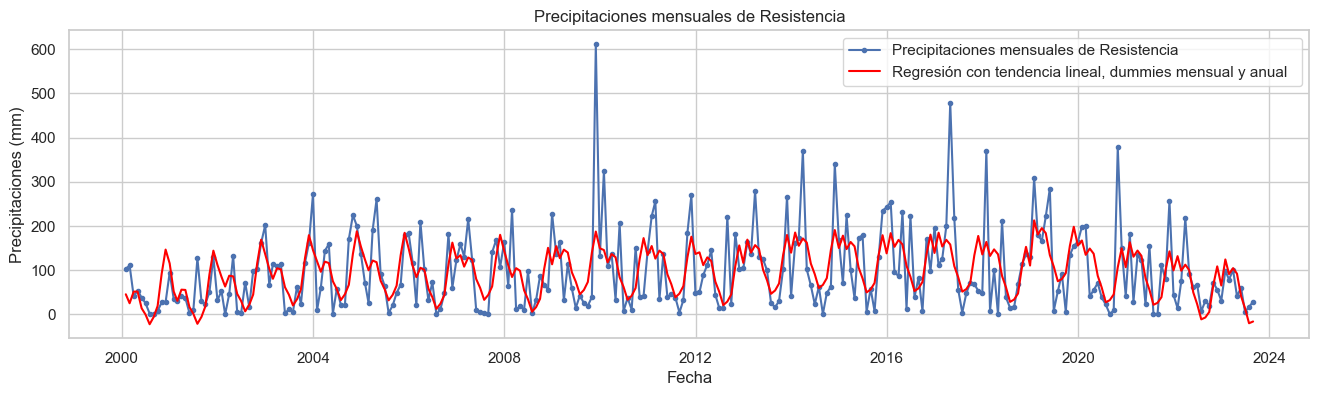

In [89]:
plt.figure(figsize=(16, 4))
plt.plot(df_mensual_resistencia.index, df_mensual_resistencia.PRCP, marker='.', linestyle='-', label='Precipitaciones mensuales de Resistencia')
plt.plot(df_mensual_resistencia.index, preds_tend_estac, color="red", label="Regresión con tendencia lineal, dummies mensual y anual  ")
plt.title('Precipitaciones mensuales de Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precipitaciones (mm)')
plt.legend()
plt.show()


Acontinuación agregamos a la regresión los datos de temperaturas medias, mínimas y máximas y unas dummies de estacionalidad para observar si mejoramos el ajuste.

In [90]:
estacionalidad=[]
estacionalidad.append('tendencia')
estacionalidad.append('tendencia_cuadrado')
estacionalidad.append('tendencia_cubo')
estacionalidad.append('TMAX')
estacionalidad.append('TMIN')
estacionalidad.append('TAVG')
for x in range(1,13,1):
    y=f"mes_{x}"
    estacionalidad.append(y)

for x in range(df_anual_resistencia.index.year.min()+1,df_anual_resistencia.index.year.max()+1,1):
    y=f"año_{x}"
    estacionalidad.append(y)


X = df_mensual_resistencia[estacionalidad]
X = sm.add_constant(X)
y = df_mensual_resistencia['PRCP']

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRCP   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3.602
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           5.17e-10
Time:                        09:29:42   Log-Likelihood:                -1615.9
No. Observations:                 284   AIC:                             3312.
Df Residuals:                     244   BIC:                             3458.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -69.1676     61.356     -1.127      0.261    -190.023      51.688
tendencia              7.7678      3.773      2.059      0.041       0.335      15.200
tendencia_cuadrado    -0.0452      0.033     -1.348      0.179      -0.111       0.021
tendencia_cubo      5.289e-05    7.7e-05      0.686      0.493   -9.89e-05       0.000
TMAX                  -5.0812      2.909     -1.747      0.082     -10.811       0.648
TMIN                   2.4077      4.521      0.533      0.595      -6.498      11.313
TAVG                   8.0927      6.852      1.181      0.239      -5.404      21.589
mes_1                  5.3945     25.760      0.209      0.834     -45.347      56.136
mes_2                -23.1563     24.428     -0.948      0.344     -71.273      24.960
mes_3                  5.4772     20.936      0.262      0.794     -35.762      46.716
mes_4                  9.7802     16.537      0.591      0.555     -22.793      42.353
mes_5                -16.2344     16.197     -1.002      0.317     -48.137      15.668
mes_6                -30.3451     18.477     -1.642      0.102     -66.740       6.050
mes_7                -40.7576     21.088     -1.933      0.054     -82.296       0.781
mes_8                -35.3126     18.891     -1.869      0.063     -72.522       1.897
mes_9                -25.4074     16.635     -1.527      0.128     -58.174       7.359
mes_10                14.9794     17.274      0.867      0.387     -19.045      49.004
mes_11                58.8182     19.513      3.014      0.003      20.382      97.254
mes_12                 7.5963     23.494      0.323      0.747     -38.681      53.874
año_2001             -78.1999     47.670     -1.640      0.102    -172.097      15.697
año_2002            -121.2627     71.113     -1.705      0.089    -261.337      18.812
año_2003            -154.9433     90.576     -1.711      0.088    -333.354      23.468
año_2004            -186.0979    103.799     -1.793      0.074    -390.555      18.359
año_2005            -217.5844    112.025     -1.942      0.053    -438.245       3.076
año_2006            -255.3409    116.087     -2.200      0.029    -484.002     -26.680
año_2007            -252.7304    115.066     -2.196      0.029    -479.381     -26.080
año_2008            -285.3845    112.331     -2.541      0.012    -506.646     -64.123
año_2009            -235.9952    106.837     -2.209      0.028    -446.436     -25.555
año_2010            -250.1526     99.497     -2.514      0.013    -446.136     -54.169
año_2011            -222.3246     91.630     -2.426      0.016    -402.811     -41.838
año_2012            -217.0437     84.048     -2.582      0.010    -382.596     -51.492
año_2013            -162.1260     75.945     -2.135      0.034    -311.717     -12.535
año_2014            -119.1071     69.3

In [91]:
estacionalidad_d=[]
estacionalidad.append('tendencia')
estacionalidad.append('tendencia_cuadrado')
estacionalidad.append('tendencia_cubo')
estacionalidad.append('TMAX')
estacionalidad.append('TMIN')
estacionalidad.append('TAVG')
for x in range(1,13,1):
    y=f"mes_{x}"
    estacionalidad.append(y)

for x in range(df_anual_resistencia.index.year.min()+1,df_anual_resistencia.index.year.max()+1,1):
    y=f"año_{x}"
    estacionalidad.append(y)


X = df_mensual_resistencia[estacionalidad]
X = sm.add_constant(X)
y = df_mensual_resistencia['PRCP']

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PRCP   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     3.602
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           5.17e-10
Time:                        09:29:42   Log-Likelihood:                -1615.9
No. Observations:                 284   AIC:                             3312.
Df Residuals:                     244   BIC:                             3458.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -64.2236     56.971     -1.127      0.261    -176.440      47.993
tendencia              3.8836      1.887      2.059      0.041       0.168       7.600
tendencia_cuadrado    -0.0226      0.017     -1.348      0.179      -0.056       0.010
tendencia_cubo      2.664e-05   3.86e-05      0.691      0.490   -4.93e-05       0.000
TMAX                  -2.5406      1.454     -1.747      0.082      -5.405       0.324
TMIN                   1.2038      2.260      0.533      0.595      -3.249       5.656
TAVG                   4.0464      3.426      1.181      0.239      -2.702      10.795
mes_1                  0.2256     14.551      0.016      0.988     -28.437      28.888
mes_2                -14.0495     13.848     -1.015      0.311     -41.327      13.228
mes_3                  0.2675     11.937      0.022      0.982     -23.246      23.781
mes_4                  2.4193      9.300      0.260      0.795     -15.899      20.737
mes_5                -10.5876      7.947     -1.332      0.184     -26.241       5.066
mes_6                -17.6427      8.582     -2.056      0.041     -34.546      -0.739
mes_7                -22.8487      9.681     -2.360      0.019     -41.918      -3.779
mes_8                -20.1258      8.882     -2.266      0.024     -37.620      -2.631
mes_9                -15.1729      8.527     -1.779      0.076     -31.969       1.624
mes_10                 5.0208      9.789      0.513      0.608     -14.260      24.302
mes_11                26.9405     11.162      2.414      0.017       4.955      48.926
mes_12                 1.3299     13.355      0.100      0.921     -24.975      27.635
año_2001             -39.0963     23.834     -1.640      0.102     -86.043       7.851
año_2002             -60.6239     35.555     -1.705      0.089    -130.657       9.409
año_2003             -77.4605     45.284     -1.711      0.088    -166.659      11.738
año_2004             -93.0341     51.895     -1.793      0.074    -195.252       9.184
año_2005            -108.7736     56.006     -1.942      0.053    -219.091       1.544
año_2006            -127.6481     58.036     -2.199      0.029    -241.964     -13.333
año_2007            -126.3392     57.525     -2.196      0.029    -239.649     -13.030
año_2008            -142.6625     56.156     -2.540      0.012    -253.275     -32.050
año_2009            -117.9642     53.409     -2.209      0.028    -223.165     -12.763
año_2010            -125.0392     49.739     -2.514      0.013    -223.011     -27.067
año_2011            -111.1215     45.806     -2.426      0.016    -201.347     -20.896
año_2012            -108.4773     42.014     -2.582      0.010    -191.235     -25.720
año_2013             -81.0148     37.967     -2.134      0.034    -155.799      -6.230
año_2014             -59.5016     34.6

In [92]:
preds_tend_estac = reg_tend_estac.predict(X)

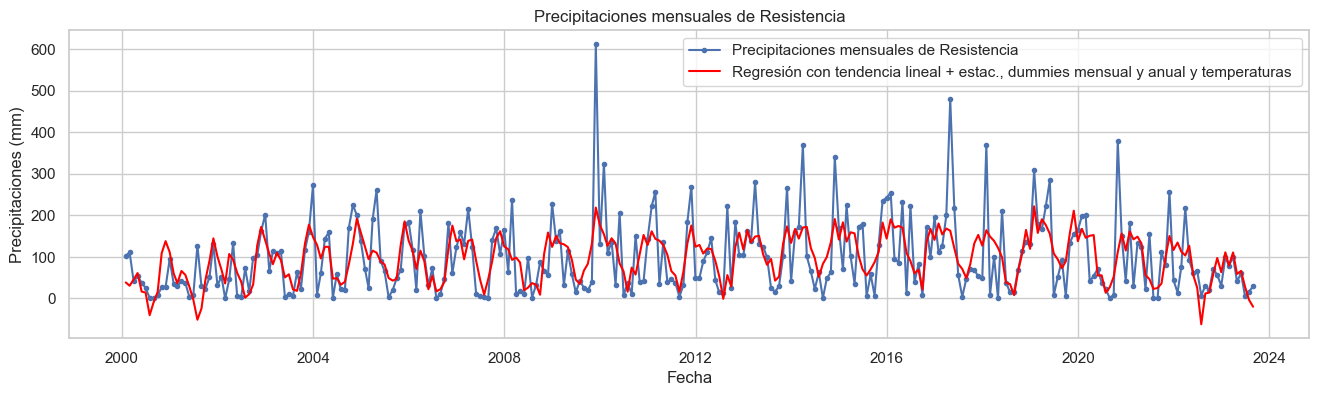

In [93]:
plt.figure(figsize=(16, 4))
plt.plot(df_mensual_resistencia.index, df_mensual_resistencia.PRCP, marker='.', linestyle='-', label='Precipitaciones mensuales de Resistencia')
plt.plot(df_mensual_resistencia.index, preds_tend_estac, color="red", label="Regresión con tendencia lineal + estac., dummies mensual y anual y temperaturas ")
plt.title('Precipitaciones mensuales de Resistencia')
plt.xlabel('Fecha')
plt.ylabel('Precipitaciones (mm)')
plt.legend()
plt.show()

Vemos que utilizando la tendencia lineal obtenemos un ajuste con R=0.012 , luego agregando las tendencias cuadraticas, cubicas, dummies por año y mes obtuvimos un ajuste con R=0.34, y finalmente agregando los datos de temperatura tuvimos un ajuste con R=0.365.

Podemos decir que el componente aleatorio o irregular es elevado, esto se podría deber a que faltarían mas datos que expliquen este componente aleatorio como por ejemplo datos de presión, humedad ambiente, vientos, etc.